#CNN
温度データから内部欠陥の位置と大きさを推定するプログラム

In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_size_path = './../tmp_simulation/tmp_data/one_hole_size_data.csv'
one_hole_position_path = './../tmp_simulation/tmp_data/one_hole_position_data.csv'
four_holes_size_path = './../tmp_simulation/tmp_data/four_holes_size_data.csv'
four_holes_position_path = './../tmp_simulation/tmp_data/four_holes_position_data.csv'
nine_holes_size_path = './../tmp_simulation/tmp_data/nine_holes_size_data.csv'
nine_holes_position_path = './../tmp_simulation/tmp_data/nine_holes_position_data.csv'
sixteen_holes_size_path = './../tmp_simulation/tmp_data/sixteen_holes_size_data.csv'
sixteen_holes_position_path = './../tmp_simulation/tmp_data/sixteen_holes_position_data.csv'
twentyfive_holes_size_path = './../tmp_simulation/tmp_data/twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_data = []
size_y_data = []
position_x_data = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(four_holes_size_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_size_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_size_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_size_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(four_holes_position_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(nine_holes_position_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(sixteen_holes_position_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(twentyfive_holes_position_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_data = np.array(size_x_data, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data = np.array(position_x_data, dtype=float)
position_y_data = np.array(position_y_data, dtype=int)

### データの加工
size_x_data = (size_x_data-no_hole_data)
position_x_data = (position_x_data-no_hole_data)
size_y_data = keras.utils.to_categorical(size_y_data, 6)
position_y_data = (position_y_data-1)
position_y_data = keras.utils.to_categorical(position_y_data, 25)

### train用とtest用に分割(4:1)
size_x_train, size_x_test, size_y_train, size_y_test = train_test_split(size_x_data, size_y_data, test_size=0.20)
position_x_train, position_x_test, position_y_train, position_y_test = train_test_split(position_x_data, position_y_data, test_size=0.20)


### reshape
size_x_train = size_x_train.reshape(8108, 50, 1)
size_x_test = size_x_test.reshape(2027, 50, 1)
position_x_train = position_x_train.reshape(8108, 50, 1)
position_x_test = position_x_test.reshape(2027, 50, 1)

In [3]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [4]:
# 学習(大きさ)
epochs = 4000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/4000
8108/8108 [==============================] - 1s 80us/step - loss: 1.5919 - accuracy: 0.2927 - val_loss: 1.5619 - val_accuracy: 0.3828
Epoch 2/4000
8108/8108 [==============================] - 0s 28us/step - loss: 1.5195 - accuracy: 0.3868 - val_loss: 1.4777 - val_accuracy: 0.3592
Epoch 3/4000
8108/8108 [==============================] - 0s 27us/step - loss: 1.4643 - accuracy: 0.4059 - val_loss: 1.4320 - val_accuracy: 0.5126
Epoch 4/4000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4174 - accuracy: 0.4318 - val_loss: 1.3752 - val_accuracy: 0.4504
Epoch 5/4000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3794 - accuracy: 0.4613 - val_loss: 1.3723 - val_accuracy: 0.3833
Epoch 6/4000
8108/8108 [==============================] - 0s 27us/step - loss: 1.3525 - accuracy: 0.4459 - val_loss: 1.3159 - val_accuracy: 0.4465
Epoch 7/4000
8108/8108 [==============================] - 0s 26us/step

Epoch 56/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.7865 - accuracy: 0.7153 - val_loss: 0.7953 - val_accuracy: 0.7425
Epoch 57/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7779 - accuracy: 0.7288 - val_loss: 0.8142 - val_accuracy: 0.6774
Epoch 58/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.7789 - accuracy: 0.7257 - val_loss: 0.7840 - val_accuracy: 0.7523
Epoch 59/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.7655 - accuracy: 0.7294 - val_loss: 0.7852 - val_accuracy: 0.7430
Epoch 60/4000
8108/8108 [==============================] - 0s 22us/step - loss: 0.7644 - accuracy: 0.7261 - val_loss: 0.7901 - val_accuracy: 0.7203
Epoch 61/4000
8108/8108 [==============================] - 0s 22us/step - loss: 0.7522 - accuracy: 0.7370 - val_loss: 0.7815 - val_accuracy: 0.7119
Epoch 62/4000
8108/8108 [==============================] - 0s 23us/step - loss: 0.7555 - accuracy: 0.7364 - val_

8108/8108 [==============================] - 0s 26us/step - loss: 0.6100 - accuracy: 0.7533 - val_loss: 0.6458 - val_accuracy: 0.7553
Epoch 112/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.5995 - accuracy: 0.7558 - val_loss: 0.6473 - val_accuracy: 0.7287
Epoch 113/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.6018 - accuracy: 0.7536 - val_loss: 0.6633 - val_accuracy: 0.7232
Epoch 114/4000
8108/8108 [==============================] - 0s 22us/step - loss: 0.6061 - accuracy: 0.7527 - val_loss: 0.6447 - val_accuracy: 0.7716
Epoch 115/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5935 - accuracy: 0.7535 - val_loss: 0.6381 - val_accuracy: 0.7706
Epoch 116/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.5925 - accuracy: 0.7556 - val_loss: 0.6477 - val_accuracy: 0.7533
Epoch 117/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.5950 - accuracy: 0.7546 - val_loss: 0.

8108/8108 [==============================] - 0s 26us/step - loss: 0.5193 - accuracy: 0.7696 - val_loss: 0.5923 - val_accuracy: 0.7306
Epoch 167/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.5203 - accuracy: 0.7674 - val_loss: 0.5762 - val_accuracy: 0.7741
Epoch 168/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.5251 - accuracy: 0.7617 - val_loss: 0.5815 - val_accuracy: 0.7755
Epoch 169/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5253 - accuracy: 0.7707 - val_loss: 0.5844 - val_accuracy: 0.7800
Epoch 170/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.5204 - accuracy: 0.7669 - val_loss: 0.5724 - val_accuracy: 0.7420
Epoch 171/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.5142 - accuracy: 0.7679 - val_loss: 0.5759 - val_accuracy: 0.7430
Epoch 172/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5188 - accuracy: 0.7662 - val_loss: 0.

8108/8108 [==============================] - 0s 26us/step - loss: 0.4775 - accuracy: 0.7694 - val_loss: 0.5271 - val_accuracy: 0.7815
Epoch 222/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4774 - accuracy: 0.7701 - val_loss: 0.5297 - val_accuracy: 0.7395
Epoch 223/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4819 - accuracy: 0.7639 - val_loss: 0.5362 - val_accuracy: 0.7410
Epoch 224/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4763 - accuracy: 0.7718 - val_loss: 0.5223 - val_accuracy: 0.7721
Epoch 225/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4759 - accuracy: 0.7715 - val_loss: 0.5582 - val_accuracy: 0.7736
Epoch 226/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4834 - accuracy: 0.7696 - val_loss: 0.5320 - val_accuracy: 0.7593
Epoch 227/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.4788 - accuracy: 0.7718 - val_loss: 0.

8108/8108 [==============================] - 0s 39us/step - loss: 0.4500 - accuracy: 0.7741 - val_loss: 0.5133 - val_accuracy: 0.7395
Epoch 277/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.4641 - accuracy: 0.7679 - val_loss: 0.5086 - val_accuracy: 0.7390
Epoch 278/4000
8108/8108 [==============================] - 0s 42us/step - loss: 0.4523 - accuracy: 0.7717 - val_loss: 0.5636 - val_accuracy: 0.7331
Epoch 279/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.4558 - accuracy: 0.7768 - val_loss: 0.5120 - val_accuracy: 0.7834
Epoch 280/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4500 - accuracy: 0.7766 - val_loss: 0.5396 - val_accuracy: 0.7380
Epoch 281/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4748 - accuracy: 0.7681 - val_loss: 0.5139 - val_accuracy: 0.7829
Epoch 282/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.4496 - accuracy: 0.7724 - val_loss: 0.

8108/8108 [==============================] - 0s 24us/step - loss: 0.4252 - accuracy: 0.7738 - val_loss: 0.4758 - val_accuracy: 0.7676
Epoch 332/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4337 - accuracy: 0.7813 - val_loss: 0.4754 - val_accuracy: 0.7874
Epoch 333/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4269 - accuracy: 0.7764 - val_loss: 0.4783 - val_accuracy: 0.7884
Epoch 334/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4238 - accuracy: 0.7789 - val_loss: 0.4770 - val_accuracy: 0.7874
Epoch 335/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4326 - accuracy: 0.7789 - val_loss: 0.5192 - val_accuracy: 0.7400
Epoch 336/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4295 - accuracy: 0.7744 - val_loss: 0.4725 - val_accuracy: 0.7815
Epoch 337/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4369 - accuracy: 0.7736 - val_loss: 0.

8108/8108 [==============================] - 0s 24us/step - loss: 0.4153 - accuracy: 0.7834 - val_loss: 0.4680 - val_accuracy: 0.7790
Epoch 387/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4135 - accuracy: 0.7832 - val_loss: 0.4567 - val_accuracy: 0.7869
Epoch 388/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4148 - accuracy: 0.7823 - val_loss: 0.5155 - val_accuracy: 0.7874
Epoch 389/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4341 - accuracy: 0.7755 - val_loss: 0.4514 - val_accuracy: 0.7854
Epoch 390/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.4153 - accuracy: 0.7813 - val_loss: 0.4551 - val_accuracy: 0.7790
Epoch 391/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4138 - accuracy: 0.7807 - val_loss: 0.4715 - val_accuracy: 0.7519
Epoch 392/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.4056 - accuracy: 0.7824 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.4028 - accuracy: 0.7764 - val_loss: 0.4636 - val_accuracy: 0.7834
Epoch 442/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3992 - accuracy: 0.7787 - val_loss: 0.4672 - val_accuracy: 0.7449
Epoch 443/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3966 - accuracy: 0.7812 - val_loss: 0.4521 - val_accuracy: 0.7874
Epoch 444/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.3941 - accuracy: 0.7882 - val_loss: 0.4776 - val_accuracy: 0.7435
Epoch 445/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.4187 - accuracy: 0.7829 - val_loss: 0.4452 - val_accuracy: 0.7898
Epoch 446/4000
8108/8108 [==============================] - 0s 36us/step - loss: 0.3979 - accuracy: 0.7863 - val_loss: 0.4453 - val_accuracy: 0.7908
Epoch 447/4000
8108/8108 [==============================] - 0s 38us/step - loss: 0.4010 - accuracy: 0.7824 - val_loss: 0.

8108/8108 [==============================] - 0s 27us/step - loss: 0.3884 - accuracy: 0.7858 - val_loss: 0.4573 - val_accuracy: 0.7923
Epoch 496/4000
8108/8108 [==============================] - ETA: 0s - loss: 0.3909 - accuracy: 0.78 - 0s 25us/step - loss: 0.3937 - accuracy: 0.7872 - val_loss: 0.5052 - val_accuracy: 0.7425
Epoch 497/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3919 - accuracy: 0.7835 - val_loss: 0.4499 - val_accuracy: 0.7602
Epoch 498/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3853 - accuracy: 0.7880 - val_loss: 0.4522 - val_accuracy: 0.7903
Epoch 499/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3944 - accuracy: 0.7808 - val_loss: 0.4730 - val_accuracy: 0.7435
Epoch 500/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3967 - accuracy: 0.7810 - val_loss: 0.5279 - val_accuracy: 0.7415
Epoch 501/4000
8108/8108 [==============================] - 0s 24us/step - loss

Epoch 550/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3867 - accuracy: 0.7863 - val_loss: 0.4327 - val_accuracy: 0.7933
Epoch 551/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3741 - accuracy: 0.7884 - val_loss: 0.4354 - val_accuracy: 0.7918
Epoch 552/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3833 - accuracy: 0.7882 - val_loss: 0.4507 - val_accuracy: 0.7928
Epoch 553/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3781 - accuracy: 0.7823 - val_loss: 0.4361 - val_accuracy: 0.7810
Epoch 554/4000
8108/8108 [==============================] - 0s 36us/step - loss: 0.3793 - accuracy: 0.7837 - val_loss: 0.4296 - val_accuracy: 0.7898
Epoch 555/4000
8108/8108 [==============================] - 0s 41us/step - loss: 0.3886 - accuracy: 0.7923 - val_loss: 0.4366 - val_accuracy: 0.7602
Epoch 556/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.3800 - accuracy: 0.7884

Epoch 605/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3642 - accuracy: 0.7906 - val_loss: 0.4398 - val_accuracy: 0.7928
Epoch 606/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3741 - accuracy: 0.7858 - val_loss: 0.4371 - val_accuracy: 0.7948
Epoch 607/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3749 - accuracy: 0.7937 - val_loss: 0.4323 - val_accuracy: 0.7898
Epoch 608/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3732 - accuracy: 0.7939 - val_loss: 0.4486 - val_accuracy: 0.7553
Epoch 609/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3693 - accuracy: 0.7916 - val_loss: 0.4313 - val_accuracy: 0.7972
Epoch 610/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3748 - accuracy: 0.7924 - val_loss: 0.4287 - val_accuracy: 0.7928
Epoch 611/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3776 - accuracy: 0.7889

Epoch 660/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3677 - accuracy: 0.7939 - val_loss: 0.4200 - val_accuracy: 0.7963
Epoch 661/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3632 - accuracy: 0.7911 - val_loss: 0.4429 - val_accuracy: 0.7538
Epoch 662/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3742 - accuracy: 0.7856 - val_loss: 0.4351 - val_accuracy: 0.7913
Epoch 663/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3619 - accuracy: 0.7870 - val_loss: 0.4403 - val_accuracy: 0.7543
Epoch 664/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3667 - accuracy: 0.7877 - val_loss: 0.4423 - val_accuracy: 0.7972
Epoch 665/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3658 - accuracy: 0.7924 - val_loss: 0.4336 - val_accuracy: 0.7642
Epoch 666/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3612 - accuracy: 0.7975

Epoch 715/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3564 - accuracy: 0.7921 - val_loss: 0.4418 - val_accuracy: 0.7588
Epoch 716/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3557 - accuracy: 0.7919 - val_loss: 0.4257 - val_accuracy: 0.7864
Epoch 717/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3553 - accuracy: 0.7898 - val_loss: 0.4425 - val_accuracy: 0.7963
Epoch 718/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3690 - accuracy: 0.7882 - val_loss: 0.4701 - val_accuracy: 0.7523
Epoch 719/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3514 - accuracy: 0.7955 - val_loss: 0.4285 - val_accuracy: 0.7977
Epoch 720/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3782 - accuracy: 0.7863 - val_loss: 0.4277 - val_accuracy: 0.7662
Epoch 721/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3563 - accuracy: 0.7929

Epoch 770/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3582 - accuracy: 0.7909 - val_loss: 0.4189 - val_accuracy: 0.7884
Epoch 771/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3574 - accuracy: 0.7960 - val_loss: 0.4337 - val_accuracy: 0.7933
Epoch 772/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3613 - accuracy: 0.7935 - val_loss: 0.4478 - val_accuracy: 0.7977
Epoch 773/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3546 - accuracy: 0.7942 - val_loss: 0.4270 - val_accuracy: 0.7972
Epoch 774/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3450 - accuracy: 0.8032 - val_loss: 0.4581 - val_accuracy: 0.7967
Epoch 775/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3672 - accuracy: 0.7903 - val_loss: 0.4545 - val_accuracy: 0.7967
Epoch 776/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3647 - accuracy: 0.7938

Epoch 825/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3434 - accuracy: 0.7913 - val_loss: 0.4442 - val_accuracy: 0.7696
Epoch 826/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.3471 - accuracy: 0.7938 - val_loss: 0.4718 - val_accuracy: 0.7967
Epoch 827/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3466 - accuracy: 0.7961 - val_loss: 0.4277 - val_accuracy: 0.7597
Epoch 828/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3505 - accuracy: 0.7928 - val_loss: 0.4440 - val_accuracy: 0.8002
Epoch 829/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3625 - accuracy: 0.7965 - val_loss: 0.4662 - val_accuracy: 0.7938
Epoch 830/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3464 - accuracy: 0.7956 - val_loss: 0.4173 - val_accuracy: 0.7691
Epoch 831/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3423 - accuracy: 0.7988

Epoch 880/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3410 - accuracy: 0.8001 - val_loss: 0.4228 - val_accuracy: 0.7775
Epoch 881/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3364 - accuracy: 0.7966 - val_loss: 0.4145 - val_accuracy: 0.7810
Epoch 882/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3525 - accuracy: 0.7924 - val_loss: 0.4159 - val_accuracy: 0.7987
Epoch 883/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3393 - accuracy: 0.7970 - val_loss: 0.4275 - val_accuracy: 0.7617
Epoch 884/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3436 - accuracy: 0.7964 - val_loss: 0.4169 - val_accuracy: 0.7834
Epoch 885/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3450 - accuracy: 0.7937 - val_loss: 0.4249 - val_accuracy: 0.8017
Epoch 886/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3416 - accuracy: 0.7965

Epoch 935/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3488 - accuracy: 0.7992 - val_loss: 0.4272 - val_accuracy: 0.7992
Epoch 936/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3403 - accuracy: 0.8028 - val_loss: 0.4937 - val_accuracy: 0.7563
Epoch 937/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3420 - accuracy: 0.8022 - val_loss: 0.4098 - val_accuracy: 0.8012
Epoch 938/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3349 - accuracy: 0.7987 - val_loss: 0.4177 - val_accuracy: 0.8002
Epoch 939/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3352 - accuracy: 0.7980 - val_loss: 0.4324 - val_accuracy: 0.7607
Epoch 940/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3492 - accuracy: 0.7956 - val_loss: 0.4111 - val_accuracy: 0.8027
Epoch 941/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3312 - accuracy: 0.8018

Epoch 990/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3342 - accuracy: 0.8009 - val_loss: 0.4184 - val_accuracy: 0.7622
Epoch 991/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3316 - accuracy: 0.7942 - val_loss: 0.4057 - val_accuracy: 0.8022
Epoch 992/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3297 - accuracy: 0.8003 - val_loss: 0.4171 - val_accuracy: 0.7642
Epoch 993/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3393 - accuracy: 0.7926 - val_loss: 0.5028 - val_accuracy: 0.8032
Epoch 994/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3500 - accuracy: 0.8009 - val_loss: 0.4240 - val_accuracy: 0.8017
Epoch 995/4000
8108/8108 [==============================] - 0s 39us/step - loss: 0.3299 - accuracy: 0.8002 - val_loss: 0.4200 - val_accuracy: 0.7637
Epoch 996/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3336 - accuracy: 0.8007

Epoch 1045/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3283 - accuracy: 0.8016 - val_loss: 0.4139 - val_accuracy: 0.7750
Epoch 1046/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3472 - accuracy: 0.7938 - val_loss: 0.4067 - val_accuracy: 0.7775
Epoch 1047/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3449 - accuracy: 0.7996 - val_loss: 0.4033 - val_accuracy: 0.7987
Epoch 1048/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3304 - accuracy: 0.7979 - val_loss: 0.4443 - val_accuracy: 0.7859
Epoch 1049/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3272 - accuracy: 0.8003 - val_loss: 0.4037 - val_accuracy: 0.8012
Epoch 1050/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3355 - accuracy: 0.7988 - val_loss: 0.4238 - val_accuracy: 0.7805
Epoch 1051/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3354 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.3265 - accuracy: 0.7940 - val_loss: 0.4358 - val_accuracy: 0.7637
Epoch 1100/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3342 - accuracy: 0.8011 - val_loss: 0.4061 - val_accuracy: 0.8022
Epoch 1101/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3280 - accuracy: 0.8057 - val_loss: 0.5067 - val_accuracy: 0.7563
Epoch 1102/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3257 - accuracy: 0.8028 - val_loss: 0.4194 - val_accuracy: 0.7805
Epoch 1103/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3261 - accuracy: 0.8017 - val_loss: 0.4156 - val_accuracy: 0.8022
Epoch 1104/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3344 - accuracy: 0.8003 - val_loss: 0.4057 - val_accuracy: 0.7736
Epoch 1105/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3251 - accuracy: 0.7958 - val_lo

Epoch 1154/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3262 - accuracy: 0.8044 - val_loss: 0.4113 - val_accuracy: 0.7889
Epoch 1155/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.3521 - accuracy: 0.7908 - val_loss: 0.4282 - val_accuracy: 0.8046
Epoch 1156/4000
8108/8108 [==============================] - 0s 51us/step - loss: 0.3220 - accuracy: 0.8030 - val_loss: 0.4062 - val_accuracy: 0.7790
Epoch 1157/4000
8108/8108 [==============================] - 0s 42us/step - loss: 0.3323 - accuracy: 0.7970 - val_loss: 0.4213 - val_accuracy: 0.7627
Epoch 1158/4000
8108/8108 [==============================] - 0s 44us/step - loss: 0.3237 - accuracy: 0.8037 - val_loss: 0.4124 - val_accuracy: 0.7958
Epoch 1159/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3235 - accuracy: 0.7991 - val_loss: 0.4270 - val_accuracy: 0.8056
Epoch 1160/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3401 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.3257 - accuracy: 0.8024 - val_loss: 0.4008 - val_accuracy: 0.7849
Epoch 1209/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3227 - accuracy: 0.8099 - val_loss: 0.4244 - val_accuracy: 0.7657
Epoch 1210/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3353 - accuracy: 0.7951 - val_loss: 0.4105 - val_accuracy: 0.7657
Epoch 1211/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3263 - accuracy: 0.8012 - val_loss: 0.4076 - val_accuracy: 0.8027
Epoch 1212/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3271 - accuracy: 0.7993 - val_loss: 0.4397 - val_accuracy: 0.7647
Epoch 1213/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.3237 - accuracy: 0.8040 - val_loss: 0.4671 - val_accuracy: 0.7622
Epoch 1214/4000
8108/8108 [==============================] - 0s 42us/step - loss: 0.3278 - accuracy: 0.8056 - val_lo

Epoch 1263/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3191 - accuracy: 0.8014 - val_loss: 0.4055 - val_accuracy: 0.7745
Epoch 1264/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3254 - accuracy: 0.8035 - val_loss: 0.4131 - val_accuracy: 0.7706
Epoch 1265/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3390 - accuracy: 0.8054 - val_loss: 0.4110 - val_accuracy: 0.8041
Epoch 1266/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3192 - accuracy: 0.7967 - val_loss: 0.3980 - val_accuracy: 0.7948
Epoch 1267/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3274 - accuracy: 0.7991 - val_loss: 0.4227 - val_accuracy: 0.7652
Epoch 1268/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3196 - accuracy: 0.8074 - val_loss: 0.4119 - val_accuracy: 0.7686
Epoch 1269/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3334 - accuracy:

8108/8108 [==============================] - 0s 32us/step - loss: 0.3273 - accuracy: 0.8018 - val_loss: 0.4312 - val_accuracy: 0.8037
Epoch 1318/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3188 - accuracy: 0.8051 - val_loss: 0.3939 - val_accuracy: 0.7849
Epoch 1319/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3227 - accuracy: 0.8006 - val_loss: 0.4023 - val_accuracy: 0.7889
Epoch 1320/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3286 - accuracy: 0.8050 - val_loss: 0.4550 - val_accuracy: 0.8061
Epoch 1321/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3245 - accuracy: 0.8011 - val_loss: 0.4104 - val_accuracy: 0.7701
Epoch 1322/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3282 - accuracy: 0.8056 - val_loss: 0.3924 - val_accuracy: 0.8037
Epoch 1323/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3226 - accuracy: 0.8004 - val_lo

Epoch 1372/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3182 - accuracy: 0.8066 - val_loss: 0.4028 - val_accuracy: 0.7701
Epoch 1373/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3172 - accuracy: 0.8033 - val_loss: 0.4053 - val_accuracy: 0.7667
Epoch 1374/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3347 - accuracy: 0.8016 - val_loss: 0.4715 - val_accuracy: 0.7617
Epoch 1375/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3281 - accuracy: 0.7971 - val_loss: 0.3964 - val_accuracy: 0.8032
Epoch 1376/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3145 - accuracy: 0.8072 - val_loss: 0.4017 - val_accuracy: 0.8056
Epoch 1377/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3214 - accuracy: 0.8094 - val_loss: 0.4294 - val_accuracy: 0.7667
Epoch 1378/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3163 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.3148 - accuracy: 0.8093 - val_loss: 0.4062 - val_accuracy: 0.8051
Epoch 1427/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3245 - accuracy: 0.8122 - val_loss: 0.4082 - val_accuracy: 0.8056
Epoch 1428/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3187 - accuracy: 0.8001 - val_loss: 0.4115 - val_accuracy: 0.7671
Epoch 1429/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3092 - accuracy: 0.8048 - val_loss: 0.4221 - val_accuracy: 0.8071
Epoch 1430/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3245 - accuracy: 0.8032 - val_loss: 0.4214 - val_accuracy: 0.7977
Epoch 1431/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3229 - accuracy: 0.7967 - val_loss: 0.4154 - val_accuracy: 0.7770
Epoch 1432/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3174 - accuracy: 0.8029 - val_lo

Epoch 1481/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.3282 - accuracy: 0.8003 - val_loss: 0.4810 - val_accuracy: 0.7617
Epoch 1482/4000
8108/8108 [==============================] - 0s 40us/step - loss: 0.3424 - accuracy: 0.7972 - val_loss: 0.4502 - val_accuracy: 0.7593
Epoch 1483/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3212 - accuracy: 0.8038 - val_loss: 0.4017 - val_accuracy: 0.7958
Epoch 1484/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3221 - accuracy: 0.7990 - val_loss: 0.3913 - val_accuracy: 0.8027
Epoch 1485/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3132 - accuracy: 0.8039 - val_loss: 0.4032 - val_accuracy: 0.7681
Epoch 1486/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3061 - accuracy: 0.8098 - val_loss: 0.4761 - val_accuracy: 0.7612
Epoch 1487/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3284 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.3183 - accuracy: 0.8033 - val_loss: 0.4091 - val_accuracy: 0.8056
Epoch 1536/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3179 - accuracy: 0.8062 - val_loss: 0.3997 - val_accuracy: 0.8061
Epoch 1537/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3146 - accuracy: 0.8006 - val_loss: 0.4125 - val_accuracy: 0.7982
Epoch 1538/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3094 - accuracy: 0.8146 - val_loss: 0.4076 - val_accuracy: 0.7671
Epoch 1539/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3265 - accuracy: 0.8018 - val_loss: 0.3937 - val_accuracy: 0.8037
Epoch 1540/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3119 - accuracy: 0.8069 - val_loss: 0.4067 - val_accuracy: 0.7765
Epoch 1541/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3120 - accuracy: 0.8048 - val_lo

Epoch 1590/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3190 - accuracy: 0.8017 - val_loss: 0.4555 - val_accuracy: 0.7647
Epoch 1591/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3152 - accuracy: 0.8060 - val_loss: 0.4041 - val_accuracy: 0.7686
Epoch 1592/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3115 - accuracy: 0.8072 - val_loss: 0.4185 - val_accuracy: 0.8071
Epoch 1593/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3225 - accuracy: 0.8032 - val_loss: 0.4420 - val_accuracy: 0.8086
Epoch 1594/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3171 - accuracy: 0.8046 - val_loss: 0.3998 - val_accuracy: 0.7760
Epoch 1595/4000
8108/8108 [==============================] - 0s 39us/step - loss: 0.3157 - accuracy: 0.8014 - val_loss: 0.3952 - val_accuracy: 0.8037
Epoch 1596/4000
8108/8108 [==============================] - 0s 41us/step - loss: 0.3073 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.3221 - accuracy: 0.8085 - val_loss: 0.4239 - val_accuracy: 0.7647
Epoch 1645/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.3173 - accuracy: 0.8023 - val_loss: 0.4370 - val_accuracy: 0.7647
Epoch 1646/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.3116 - accuracy: 0.8013 - val_loss: 0.3980 - val_accuracy: 0.8071
Epoch 1647/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3092 - accuracy: 0.8053 - val_loss: 0.3949 - val_accuracy: 0.8041
Epoch 1648/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3116 - accuracy: 0.8040 - val_loss: 0.3987 - val_accuracy: 0.8032
Epoch 1649/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3078 - accuracy: 0.8027 - val_loss: 0.4171 - val_accuracy: 0.8081
Epoch 1650/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.3049 - accuracy: 0.8080 - val_lo

Epoch 1699/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.3060 - accuracy: 0.8071 - val_loss: 0.4199 - val_accuracy: 0.7617
Epoch 1700/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3118 - accuracy: 0.8075 - val_loss: 0.4121 - val_accuracy: 0.7676
Epoch 1701/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3143 - accuracy: 0.8033 - val_loss: 0.3881 - val_accuracy: 0.8061
Epoch 1702/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3133 - accuracy: 0.8048 - val_loss: 0.4155 - val_accuracy: 0.7731
Epoch 1703/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3122 - accuracy: 0.8049 - val_loss: 0.3907 - val_accuracy: 0.7992
Epoch 1704/4000
8108/8108 [==============================] - 0s 42us/step - loss: 0.3156 - accuracy: 0.8038 - val_loss: 0.3873 - val_accuracy: 0.8037
Epoch 1705/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.3061 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.3342 - accuracy: 0.8032 - val_loss: 0.4001 - val_accuracy: 0.8071
Epoch 1754/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3220 - accuracy: 0.8044 - val_loss: 0.3942 - val_accuracy: 0.7815
Epoch 1755/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3177 - accuracy: 0.8041 - val_loss: 0.4246 - val_accuracy: 0.7736
Epoch 1756/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3140 - accuracy: 0.8056 - val_loss: 0.3982 - val_accuracy: 0.8066
Epoch 1757/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3111 - accuracy: 0.7977 - val_loss: 0.4047 - val_accuracy: 0.8076
Epoch 1758/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3160 - accuracy: 0.8033 - val_loss: 0.3960 - val_accuracy: 0.8027
Epoch 1759/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3095 - accuracy: 0.8055 - val_lo

Epoch 1808/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.3076 - accuracy: 0.8004 - val_loss: 0.4013 - val_accuracy: 0.7691
Epoch 1809/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3045 - accuracy: 0.8078 - val_loss: 0.3995 - val_accuracy: 0.7741
Epoch 1810/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3004 - accuracy: 0.8075 - val_loss: 0.3923 - val_accuracy: 0.8066
Epoch 1811/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3059 - accuracy: 0.8048 - val_loss: 0.4009 - val_accuracy: 0.7736
Epoch 1812/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3063 - accuracy: 0.8092 - val_loss: 0.3952 - val_accuracy: 0.8096
Epoch 1813/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3054 - accuracy: 0.8033 - val_loss: 0.3841 - val_accuracy: 0.8061
Epoch 1814/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3062 - accuracy:

8108/8108 [==============================] - 0s 28us/step - loss: 0.3021 - accuracy: 0.8080 - val_loss: 0.3885 - val_accuracy: 0.7928
Epoch 1863/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3093 - accuracy: 0.8028 - val_loss: 0.3974 - val_accuracy: 0.8066
Epoch 1864/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3067 - accuracy: 0.8044 - val_loss: 0.3894 - val_accuracy: 0.8081
Epoch 1865/4000
8108/8108 [==============================] - 0s 42us/step - loss: 0.3123 - accuracy: 0.8061 - val_loss: 0.3928 - val_accuracy: 0.8076
Epoch 1866/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2998 - accuracy: 0.8081 - val_loss: 0.3945 - val_accuracy: 0.7701
Epoch 1867/4000
8108/8108 [==============================] - ETA: 0s - loss: 0.2997 - accuracy: 0.81 - 0s 25us/step - loss: 0.2998 - accuracy: 0.8133 - val_loss: 0.3896 - val_accuracy: 0.7765
Epoch 1868/4000
8108/8108 [==============================] - 0s 25us/step 

8108/8108 [==============================] - 0s 33us/step - loss: 0.3019 - accuracy: 0.8108 - val_loss: 0.4210 - val_accuracy: 0.7676
Epoch 1917/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3068 - accuracy: 0.8059 - val_loss: 0.3846 - val_accuracy: 0.7879
Epoch 1918/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3190 - accuracy: 0.7995 - val_loss: 0.3957 - val_accuracy: 0.8081
Epoch 1919/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3059 - accuracy: 0.8054 - val_loss: 0.4105 - val_accuracy: 0.8086
Epoch 1920/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.3078 - accuracy: 0.8072 - val_loss: 0.3877 - val_accuracy: 0.8022
Epoch 1921/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.3027 - accuracy: 0.8092 - val_loss: 0.3810 - val_accuracy: 0.7967
Epoch 1922/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3035 - accuracy: 0.8057 - val_lo

Epoch 1971/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2999 - accuracy: 0.8050 - val_loss: 0.3829 - val_accuracy: 0.8027
Epoch 1972/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3062 - accuracy: 0.8070 - val_loss: 0.3819 - val_accuracy: 0.8027
Epoch 1973/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3016 - accuracy: 0.8081 - val_loss: 0.3857 - val_accuracy: 0.8101
Epoch 1974/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3040 - accuracy: 0.8053 - val_loss: 0.3937 - val_accuracy: 0.8086
Epoch 1975/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3076 - accuracy: 0.8060 - val_loss: 0.4264 - val_accuracy: 0.8076
Epoch 1976/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3149 - accuracy: 0.8039 - val_loss: 0.3860 - val_accuracy: 0.7795
Epoch 1977/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3111 - accuracy:

8108/8108 [==============================] - 0s 40us/step - loss: 0.2981 - accuracy: 0.8067 - val_loss: 0.4024 - val_accuracy: 0.8066
Epoch 2026/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3090 - accuracy: 0.8032 - val_loss: 0.3936 - val_accuracy: 0.8076
Epoch 2027/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3132 - accuracy: 0.8039 - val_loss: 0.3819 - val_accuracy: 0.7760
Epoch 2028/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2968 - accuracy: 0.8067 - val_loss: 0.3946 - val_accuracy: 0.7696
Epoch 2029/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3046 - accuracy: 0.8060 - val_loss: 0.4041 - val_accuracy: 0.7671
Epoch 2030/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3038 - accuracy: 0.8108 - val_loss: 0.4130 - val_accuracy: 0.8081
Epoch 2031/4000
8108/8108 [==============================] - 1s 73us/step - loss: 0.3096 - accuracy: 0.7996 - val_lo

Epoch 2080/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2982 - accuracy: 0.8071 - val_loss: 0.3856 - val_accuracy: 0.8076
Epoch 2081/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3048 - accuracy: 0.8102 - val_loss: 0.3964 - val_accuracy: 0.7775
Epoch 2082/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3050 - accuracy: 0.8044 - val_loss: 0.3898 - val_accuracy: 0.7805
Epoch 2083/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.2970 - accuracy: 0.8104 - val_loss: 0.3767 - val_accuracy: 0.8017
Epoch 2084/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2995 - accuracy: 0.8082 - val_loss: 0.3901 - val_accuracy: 0.8046
Epoch 2085/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.2999 - accuracy: 0.8113 - val_loss: 0.3839 - val_accuracy: 0.8041
Epoch 2086/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3081 - accuracy:

8108/8108 [==============================] - 0s 24us/step - loss: 0.3179 - accuracy: 0.7956 - val_loss: 0.3827 - val_accuracy: 0.7775
Epoch 2135/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3055 - accuracy: 0.8104 - val_loss: 0.4193 - val_accuracy: 0.7696
Epoch 2136/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3062 - accuracy: 0.8094 - val_loss: 0.3862 - val_accuracy: 0.7819
Epoch 2137/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2983 - accuracy: 0.8090 - val_loss: 0.4579 - val_accuracy: 0.7637
Epoch 2138/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3101 - accuracy: 0.8097 - val_loss: 0.3799 - val_accuracy: 0.8076
Epoch 2139/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3057 - accuracy: 0.8046 - val_loss: 0.3822 - val_accuracy: 0.8091
Epoch 2140/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3070 - accuracy: 0.8070 - val_lo

Epoch 2189/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3088 - accuracy: 0.8029 - val_loss: 0.3802 - val_accuracy: 0.7834
Epoch 2190/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3016 - accuracy: 0.8091 - val_loss: 0.4208 - val_accuracy: 0.8091
Epoch 2191/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2988 - accuracy: 0.8071 - val_loss: 0.3919 - val_accuracy: 0.7731
Epoch 2192/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2957 - accuracy: 0.8108 - val_loss: 0.3772 - val_accuracy: 0.8081
Epoch 2193/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2958 - accuracy: 0.8072 - val_loss: 0.3873 - val_accuracy: 0.7741
Epoch 2194/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2990 - accuracy: 0.8098 - val_loss: 0.4248 - val_accuracy: 0.7657
Epoch 2195/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3176 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.2995 - accuracy: 0.8099 - val_loss: 0.3785 - val_accuracy: 0.7819
Epoch 2244/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3035 - accuracy: 0.8013 - val_loss: 0.3842 - val_accuracy: 0.8091
Epoch 2245/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2938 - accuracy: 0.8070 - val_loss: 0.3802 - val_accuracy: 0.8041
Epoch 2246/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2994 - accuracy: 0.8078 - val_loss: 0.3792 - val_accuracy: 0.7874
Epoch 2247/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2977 - accuracy: 0.8080 - val_loss: 0.3853 - val_accuracy: 0.7958
Epoch 2248/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3013 - accuracy: 0.8060 - val_loss: 0.4090 - val_accuracy: 0.7691
Epoch 2249/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2951 - accuracy: 0.8118 - val_lo

8108/8108 [==============================] - 0s 25us/step - loss: 0.3126 - accuracy: 0.8000 - val_loss: 0.3898 - val_accuracy: 0.8066
Epoch 2298/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3011 - accuracy: 0.8018 - val_loss: 0.3760 - val_accuracy: 0.8061
Epoch 2299/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2973 - accuracy: 0.8064 - val_loss: 0.3862 - val_accuracy: 0.7770
Epoch 2300/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2955 - accuracy: 0.8175 - val_loss: 0.4400 - val_accuracy: 0.8091
Epoch 2301/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3073 - accuracy: 0.8075 - val_loss: 0.4139 - val_accuracy: 0.7686
Epoch 2302/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3094 - accuracy: 0.8085 - val_loss: 0.3989 - val_accuracy: 0.7731
Epoch 2303/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3046 - accuracy: 0.8109 - val_lo

Epoch 2352/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3008 - accuracy: 0.8077 - val_loss: 0.4003 - val_accuracy: 0.7716
Epoch 2353/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3077 - accuracy: 0.8061 - val_loss: 0.3842 - val_accuracy: 0.8071
Epoch 2354/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2966 - accuracy: 0.8081 - val_loss: 0.3836 - val_accuracy: 0.7805
Epoch 2355/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2998 - accuracy: 0.8094 - val_loss: 0.3697 - val_accuracy: 0.8091
Epoch 2356/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2950 - accuracy: 0.8125 - val_loss: 0.3792 - val_accuracy: 0.8081
Epoch 2357/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2943 - accuracy: 0.8109 - val_loss: 0.3701 - val_accuracy: 0.8076
Epoch 2358/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2939 - accuracy:

8108/8108 [==============================] - 0s 24us/step - loss: 0.2959 - accuracy: 0.8139 - val_loss: 0.3996 - val_accuracy: 0.8071
Epoch 2407/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3231 - accuracy: 0.7950 - val_loss: 0.4005 - val_accuracy: 0.8081
Epoch 2408/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2967 - accuracy: 0.8097 - val_loss: 0.4049 - val_accuracy: 0.8111
Epoch 2409/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2994 - accuracy: 0.8069 - val_loss: 0.3788 - val_accuracy: 0.7893
Epoch 2410/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3020 - accuracy: 0.8060 - val_loss: 0.3826 - val_accuracy: 0.8086
Epoch 2411/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2974 - accuracy: 0.8078 - val_loss: 0.3755 - val_accuracy: 0.7874
Epoch 2412/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2944 - accuracy: 0.8107 - val_lo

Epoch 2461/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3017 - accuracy: 0.8057 - val_loss: 0.3743 - val_accuracy: 0.8096
Epoch 2462/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2930 - accuracy: 0.8098 - val_loss: 0.3783 - val_accuracy: 0.7721
Epoch 2463/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2990 - accuracy: 0.8085 - val_loss: 0.3873 - val_accuracy: 0.8091
Epoch 2464/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2930 - accuracy: 0.8104 - val_loss: 0.3866 - val_accuracy: 0.8056
Epoch 2465/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3011 - accuracy: 0.8103 - val_loss: 0.3806 - val_accuracy: 0.8056
Epoch 2466/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3031 - accuracy: 0.8075 - val_loss: 0.4538 - val_accuracy: 0.7667
Epoch 2467/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3015 - accuracy:

8108/8108 [==============================] - 0s 24us/step - loss: 0.2987 - accuracy: 0.8064 - val_loss: 0.3768 - val_accuracy: 0.8111
Epoch 2516/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3006 - accuracy: 0.8065 - val_loss: 0.3933 - val_accuracy: 0.8130
Epoch 2517/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3088 - accuracy: 0.8029 - val_loss: 0.3834 - val_accuracy: 0.8066
Epoch 2518/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.2970 - accuracy: 0.8062 - val_loss: 0.4019 - val_accuracy: 0.7701
Epoch 2519/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3009 - accuracy: 0.8081 - val_loss: 0.4033 - val_accuracy: 0.7824
Epoch 2520/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3033 - accuracy: 0.8053 - val_loss: 0.4043 - val_accuracy: 0.7691
Epoch 2521/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2990 - accuracy: 0.8030 - val_lo

Epoch 2570/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2961 - accuracy: 0.8040 - val_loss: 0.3874 - val_accuracy: 0.7726
Epoch 2571/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2965 - accuracy: 0.8138 - val_loss: 0.3911 - val_accuracy: 0.7671
Epoch 2572/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3054 - accuracy: 0.8038 - val_loss: 0.4020 - val_accuracy: 0.7711
Epoch 2573/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2935 - accuracy: 0.8114 - val_loss: 0.3907 - val_accuracy: 0.8115
Epoch 2574/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2938 - accuracy: 0.8101 - val_loss: 0.3941 - val_accuracy: 0.8120
Epoch 2575/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3039 - accuracy: 0.8066 - val_loss: 0.4658 - val_accuracy: 0.8101
Epoch 2576/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3250 - accuracy:

8108/8108 [==============================] - 0s 28us/step - loss: 0.3046 - accuracy: 0.8078 - val_loss: 0.3744 - val_accuracy: 0.8091
Epoch 2625/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.2904 - accuracy: 0.8090 - val_loss: 0.4142 - val_accuracy: 0.7691
Epoch 2626/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.3094 - accuracy: 0.8065 - val_loss: 0.3914 - val_accuracy: 0.8061
Epoch 2627/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2992 - accuracy: 0.8123 - val_loss: 0.3790 - val_accuracy: 0.8051
Epoch 2628/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3176 - accuracy: 0.8087 - val_loss: 0.3754 - val_accuracy: 0.7834
Epoch 2629/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3009 - accuracy: 0.8039 - val_loss: 0.3832 - val_accuracy: 0.8051
Epoch 2630/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2963 - accuracy: 0.8061 - val_lo

Epoch 2679/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2887 - accuracy: 0.8130 - val_loss: 0.4125 - val_accuracy: 0.8076
Epoch 2680/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2973 - accuracy: 0.8111 - val_loss: 0.3771 - val_accuracy: 0.7800
Epoch 2681/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2943 - accuracy: 0.8074 - val_loss: 0.4089 - val_accuracy: 0.8111
Epoch 2682/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2955 - accuracy: 0.8117 - val_loss: 0.3853 - val_accuracy: 0.7750
Epoch 2683/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2934 - accuracy: 0.8060 - val_loss: 0.3971 - val_accuracy: 0.7701
Epoch 2684/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2948 - accuracy: 0.8080 - val_loss: 0.3874 - val_accuracy: 0.8081
Epoch 2685/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2921 - accuracy:

8108/8108 [==============================] - 0s 24us/step - loss: 0.2984 - accuracy: 0.8138 - val_loss: 0.4029 - val_accuracy: 0.8125
Epoch 2734/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2989 - accuracy: 0.8028 - val_loss: 0.3844 - val_accuracy: 0.7711
Epoch 2735/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2938 - accuracy: 0.8115 - val_loss: 0.3840 - val_accuracy: 0.7750
Epoch 2736/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.3205 - accuracy: 0.7986 - val_loss: 0.4087 - val_accuracy: 0.7676
Epoch 2737/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3077 - accuracy: 0.8075 - val_loss: 0.4133 - val_accuracy: 0.8111
Epoch 2738/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2992 - accuracy: 0.8041 - val_loss: 0.3807 - val_accuracy: 0.8101
Epoch 2739/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2980 - accuracy: 0.8061 - val_lo

Epoch 2788/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3012 - accuracy: 0.8092 - val_loss: 0.3820 - val_accuracy: 0.8071
Epoch 2789/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2900 - accuracy: 0.8093 - val_loss: 0.3789 - val_accuracy: 0.7869
Epoch 2790/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2928 - accuracy: 0.8057 - val_loss: 0.3795 - val_accuracy: 0.8091
Epoch 2791/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2949 - accuracy: 0.8082 - val_loss: 0.3839 - val_accuracy: 0.7844
Epoch 2792/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2886 - accuracy: 0.8093 - val_loss: 0.3840 - val_accuracy: 0.8111
Epoch 2793/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3058 - accuracy: 0.8060 - val_loss: 0.3986 - val_accuracy: 0.7691
Epoch 2794/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2940 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.2913 - accuracy: 0.8061 - val_loss: 0.3817 - val_accuracy: 0.7819
Epoch 2843/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2868 - accuracy: 0.8165 - val_loss: 0.3839 - val_accuracy: 0.8111
Epoch 2844/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2908 - accuracy: 0.8075 - val_loss: 0.3973 - val_accuracy: 0.7711
Epoch 2845/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2909 - accuracy: 0.8099 - val_loss: 0.3774 - val_accuracy: 0.8101
Epoch 2846/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2956 - accuracy: 0.8141 - val_loss: 0.3776 - val_accuracy: 0.7874
Epoch 2847/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3016 - accuracy: 0.8093 - val_loss: 0.3944 - val_accuracy: 0.7726
Epoch 2848/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2930 - accuracy: 0.8125 - val_lo

Epoch 2897/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2960 - accuracy: 0.8148 - val_loss: 0.3966 - val_accuracy: 0.8056
Epoch 2898/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.3010 - accuracy: 0.8098 - val_loss: 0.4571 - val_accuracy: 0.7662
Epoch 2899/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2911 - accuracy: 0.8141 - val_loss: 0.3797 - val_accuracy: 0.7953
Epoch 2900/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2881 - accuracy: 0.8099 - val_loss: 0.3924 - val_accuracy: 0.7745
Epoch 2901/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2978 - accuracy: 0.8096 - val_loss: 0.4032 - val_accuracy: 0.8111
Epoch 2902/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2931 - accuracy: 0.8075 - val_loss: 0.3960 - val_accuracy: 0.7750
Epoch 2903/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2943 - accuracy:

8108/8108 [==============================] - 0s 24us/step - loss: 0.2910 - accuracy: 0.8114 - val_loss: 0.3876 - val_accuracy: 0.7854
Epoch 2952/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2933 - accuracy: 0.8094 - val_loss: 0.4362 - val_accuracy: 0.7706
Epoch 2953/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3047 - accuracy: 0.8081 - val_loss: 0.3828 - val_accuracy: 0.8096
Epoch 2954/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3011 - accuracy: 0.8080 - val_loss: 0.3868 - val_accuracy: 0.8111
Epoch 2955/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2930 - accuracy: 0.8096 - val_loss: 0.3884 - val_accuracy: 0.7815
Epoch 2956/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2968 - accuracy: 0.8097 - val_loss: 0.3836 - val_accuracy: 0.8106
Epoch 2957/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2893 - accuracy: 0.8136 - val_lo

Epoch 3006/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2904 - accuracy: 0.8074 - val_loss: 0.4144 - val_accuracy: 0.7706
Epoch 3007/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2920 - accuracy: 0.8078 - val_loss: 0.3842 - val_accuracy: 0.7815
Epoch 3008/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.2959 - accuracy: 0.8098 - val_loss: 0.3820 - val_accuracy: 0.7972
Epoch 3009/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2997 - accuracy: 0.8086 - val_loss: 0.4375 - val_accuracy: 0.7721
Epoch 3010/4000
8108/8108 [==============================] - 0s 47us/step - loss: 0.2963 - accuracy: 0.8046 - val_loss: 0.4249 - val_accuracy: 0.7686
Epoch 3011/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2990 - accuracy: 0.8080 - val_loss: 0.3882 - val_accuracy: 0.8076
Epoch 3012/4000
8108/8108 [==============================] - 0s 45us/step - loss: 0.2972 - accuracy:

8108/8108 [==============================] - 0s 27us/step - loss: 0.2913 - accuracy: 0.8149 - val_loss: 0.3796 - val_accuracy: 0.8115
Epoch 3061/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2904 - accuracy: 0.8072 - val_loss: 0.3795 - val_accuracy: 0.8091
Epoch 3062/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2923 - accuracy: 0.8076 - val_loss: 0.3954 - val_accuracy: 0.7795
Epoch 3063/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2925 - accuracy: 0.8139 - val_loss: 0.3854 - val_accuracy: 0.8106
Epoch 3064/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2944 - accuracy: 0.8060 - val_loss: 0.3909 - val_accuracy: 0.7834
Epoch 3065/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2910 - accuracy: 0.8157 - val_loss: 0.3943 - val_accuracy: 0.7716
Epoch 3066/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2902 - accuracy: 0.8069 - val_lo

Epoch 3115/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3058 - accuracy: 0.8122 - val_loss: 0.3961 - val_accuracy: 0.8091
Epoch 3116/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2899 - accuracy: 0.8060 - val_loss: 0.3789 - val_accuracy: 0.7889
Epoch 3117/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2927 - accuracy: 0.8119 - val_loss: 0.3800 - val_accuracy: 0.8096
Epoch 3118/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2859 - accuracy: 0.8131 - val_loss: 0.3776 - val_accuracy: 0.7997
Epoch 3119/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3038 - accuracy: 0.8030 - val_loss: 0.3791 - val_accuracy: 0.8091
Epoch 3120/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2875 - accuracy: 0.8129 - val_loss: 0.3812 - val_accuracy: 0.8091
Epoch 3121/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2947 - accuracy:

8108/8108 [==============================] - 0s 28us/step - loss: 0.2905 - accuracy: 0.8053 - val_loss: 0.3996 - val_accuracy: 0.8130
Epoch 3170/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.2956 - accuracy: 0.8091 - val_loss: 0.3903 - val_accuracy: 0.7686
Epoch 3171/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2885 - accuracy: 0.8104 - val_loss: 0.3829 - val_accuracy: 0.8061
Epoch 3172/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.3012 - accuracy: 0.8078 - val_loss: 0.3996 - val_accuracy: 0.7745
Epoch 3173/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3012 - accuracy: 0.8039 - val_loss: 0.3983 - val_accuracy: 0.7711
Epoch 3174/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.2912 - accuracy: 0.8134 - val_loss: 0.3864 - val_accuracy: 0.8096
Epoch 3175/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2868 - accuracy: 0.8140 - val_lo

Epoch 3224/4000
8108/8108 [==============================] - 0s 40us/step - loss: 0.2854 - accuracy: 0.8166 - val_loss: 0.3914 - val_accuracy: 0.7755
Epoch 3225/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.2947 - accuracy: 0.8154 - val_loss: 0.4182 - val_accuracy: 0.7711
Epoch 3226/4000
8108/8108 [==============================] - 0s 48us/step - loss: 0.3026 - accuracy: 0.8059 - val_loss: 0.3830 - val_accuracy: 0.8071
Epoch 3227/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.2863 - accuracy: 0.8080 - val_loss: 0.3733 - val_accuracy: 0.8076
Epoch 3228/4000
8108/8108 [==============================] - 0s 51us/step - loss: 0.2920 - accuracy: 0.8107 - val_loss: 0.3780 - val_accuracy: 0.8101
Epoch 3229/4000
8108/8108 [==============================] - 0s 39us/step - loss: 0.2865 - accuracy: 0.8136 - val_loss: 0.3926 - val_accuracy: 0.8125
Epoch 3230/4000
8108/8108 [==============================] - 0s 41us/step - loss: 0.2912 - accuracy:

8108/8108 [==============================] - 0s 35us/step - loss: 0.2967 - accuracy: 0.8048 - val_loss: 0.3817 - val_accuracy: 0.7815
Epoch 3279/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2898 - accuracy: 0.8083 - val_loss: 0.3795 - val_accuracy: 0.7815
Epoch 3280/4000
8108/8108 [==============================] - 0s 36us/step - loss: 0.2904 - accuracy: 0.8096 - val_loss: 0.3894 - val_accuracy: 0.7874
Epoch 3281/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.2884 - accuracy: 0.8119 - val_loss: 0.4064 - val_accuracy: 0.8120
Epoch 3282/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.2926 - accuracy: 0.8119 - val_loss: 0.3767 - val_accuracy: 0.8056
Epoch 3283/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.2906 - accuracy: 0.8109 - val_loss: 0.3882 - val_accuracy: 0.8120
Epoch 3284/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2933 - accuracy: 0.8088 - val_lo

Epoch 3333/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2861 - accuracy: 0.8077 - val_loss: 0.3843 - val_accuracy: 0.7711
Epoch 3334/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2901 - accuracy: 0.8072 - val_loss: 0.4006 - val_accuracy: 0.7716
Epoch 3335/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2920 - accuracy: 0.8091 - val_loss: 0.4087 - val_accuracy: 0.7711
Epoch 3336/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2988 - accuracy: 0.8154 - val_loss: 0.3910 - val_accuracy: 0.7741
Epoch 3337/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2865 - accuracy: 0.8102 - val_loss: 0.3828 - val_accuracy: 0.7810
Epoch 3338/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2853 - accuracy: 0.8138 - val_loss: 0.3859 - val_accuracy: 0.8115
Epoch 3339/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2888 - accuracy:

8108/8108 [==============================] - 0s 27us/step - loss: 0.2901 - accuracy: 0.8066 - val_loss: 0.3850 - val_accuracy: 0.8081
Epoch 3388/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2881 - accuracy: 0.8081 - val_loss: 0.3786 - val_accuracy: 0.7859
Epoch 3389/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.2883 - accuracy: 0.8127 - val_loss: 0.3930 - val_accuracy: 0.8096
Epoch 3390/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.2908 - accuracy: 0.8087 - val_loss: 0.3954 - val_accuracy: 0.8125
Epoch 3391/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3011 - accuracy: 0.8092 - val_loss: 0.4291 - val_accuracy: 0.8120
Epoch 3392/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2918 - accuracy: 0.8102 - val_loss: 0.3749 - val_accuracy: 0.7977
Epoch 3393/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2909 - accuracy: 0.8128 - val_lo

8108/8108 [==============================] - 0s 26us/step - loss: 0.2887 - accuracy: 0.8072 - val_loss: 0.3845 - val_accuracy: 0.8120
Epoch 3442/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2841 - accuracy: 0.8104 - val_loss: 0.3865 - val_accuracy: 0.7819
Epoch 3443/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2936 - accuracy: 0.8037 - val_loss: 0.3966 - val_accuracy: 0.8081
Epoch 3444/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2940 - accuracy: 0.8102 - val_loss: 0.3786 - val_accuracy: 0.8101
Epoch 3445/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.2908 - accuracy: 0.8064 - val_loss: 0.3919 - val_accuracy: 0.7741
Epoch 3446/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2904 - accuracy: 0.8125 - val_loss: 0.3881 - val_accuracy: 0.8081
Epoch 3447/4000
8108/8108 [==============================] - 0s 30us/step - loss: 0.2921 - accuracy: 0.8045 - val_lo

Epoch 3496/4000
8108/8108 [==============================] - 0s 27us/step - loss: 0.2849 - accuracy: 0.8130 - val_loss: 0.3873 - val_accuracy: 0.8115
Epoch 3497/4000
8108/8108 [==============================] - 0s 48us/step - loss: 0.2999 - accuracy: 0.8032 - val_loss: 0.4001 - val_accuracy: 0.7721
Epoch 3498/4000
8108/8108 [==============================] - 0s 41us/step - loss: 0.2867 - accuracy: 0.8119 - val_loss: 0.3790 - val_accuracy: 0.8106
Epoch 3499/4000
8108/8108 [==============================] - 0s 41us/step - loss: 0.2913 - accuracy: 0.8072 - val_loss: 0.4101 - val_accuracy: 0.8135
Epoch 3500/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.2885 - accuracy: 0.8088 - val_loss: 0.3852 - val_accuracy: 0.7800
Epoch 3501/4000
8108/8108 [==============================] - 0s 37us/step - loss: 0.2857 - accuracy: 0.8152 - val_loss: 0.3947 - val_accuracy: 0.7745
Epoch 3502/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2886 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.2916 - accuracy: 0.8076 - val_loss: 0.3927 - val_accuracy: 0.7706
Epoch 3551/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2963 - accuracy: 0.8085 - val_loss: 0.3861 - val_accuracy: 0.8120
Epoch 3552/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2881 - accuracy: 0.8075 - val_loss: 0.3821 - val_accuracy: 0.8106
Epoch 3553/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2988 - accuracy: 0.8064 - val_loss: 0.3967 - val_accuracy: 0.8101
Epoch 3554/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2920 - accuracy: 0.8076 - val_loss: 0.4326 - val_accuracy: 0.8140
Epoch 3555/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2882 - accuracy: 0.8124 - val_loss: 0.3924 - val_accuracy: 0.7736
Epoch 3556/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2944 - accuracy: 0.8059 - val_lo

Epoch 3605/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2929 - accuracy: 0.8048 - val_loss: 0.3793 - val_accuracy: 0.7908
Epoch 3606/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2858 - accuracy: 0.8117 - val_loss: 0.3814 - val_accuracy: 0.7834
Epoch 3607/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2909 - accuracy: 0.8117 - val_loss: 0.4109 - val_accuracy: 0.8120
Epoch 3608/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2918 - accuracy: 0.8127 - val_loss: 0.3703 - val_accuracy: 0.8007
Epoch 3609/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2971 - accuracy: 0.8127 - val_loss: 0.3930 - val_accuracy: 0.8101
Epoch 3610/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2877 - accuracy: 0.8096 - val_loss: 0.3914 - val_accuracy: 0.8106
Epoch 3611/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2939 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 0.2850 - accuracy: 0.8157 - val_loss: 0.3854 - val_accuracy: 0.7997
Epoch 3660/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.2844 - accuracy: 0.8104 - val_loss: 0.3736 - val_accuracy: 0.8125
Epoch 3661/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2847 - accuracy: 0.8128 - val_loss: 0.3786 - val_accuracy: 0.7815
Epoch 3662/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2880 - accuracy: 0.8065 - val_loss: 0.3828 - val_accuracy: 0.8111
Epoch 3663/4000
8108/8108 [==============================] - 0s 32us/step - loss: 0.2934 - accuracy: 0.8045 - val_loss: 0.3791 - val_accuracy: 0.7765
Epoch 3664/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2839 - accuracy: 0.8131 - val_loss: 0.3855 - val_accuracy: 0.8130
Epoch 3665/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2879 - accuracy: 0.8098 - val_lo

Epoch 3714/4000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3019 - accuracy: 0.8025 - val_loss: 0.4208 - val_accuracy: 0.8145
Epoch 3715/4000
8108/8108 [==============================] - 0s 29us/step - loss: 0.2967 - accuracy: 0.8130 - val_loss: 0.3807 - val_accuracy: 0.8120
Epoch 3716/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2854 - accuracy: 0.8115 - val_loss: 0.3737 - val_accuracy: 0.8111
Epoch 3717/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2894 - accuracy: 0.8081 - val_loss: 0.4024 - val_accuracy: 0.7731
Epoch 3718/4000
8108/8108 [==============================] - 0s 36us/step - loss: 0.2930 - accuracy: 0.8102 - val_loss: 0.4110 - val_accuracy: 0.7701
Epoch 3719/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.2888 - accuracy: 0.8138 - val_loss: 0.4130 - val_accuracy: 0.8135
Epoch 3720/4000
8108/8108 [==============================] - 0s 33us/step - loss: 0.2928 - accuracy:

8108/8108 [==============================] - 0s 25us/step - loss: 0.2819 - accuracy: 0.8129 - val_loss: 0.3859 - val_accuracy: 0.8120
Epoch 3769/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2854 - accuracy: 0.8136 - val_loss: 0.3808 - val_accuracy: 0.7879
Epoch 3770/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2890 - accuracy: 0.8120 - val_loss: 0.3790 - val_accuracy: 0.8081
Epoch 3771/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2944 - accuracy: 0.8078 - val_loss: 0.3755 - val_accuracy: 0.8091
Epoch 3772/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2842 - accuracy: 0.8074 - val_loss: 0.3762 - val_accuracy: 0.8056
Epoch 3773/4000
8108/8108 [==============================] - ETA: 0s - loss: 0.2882 - accuracy: 0.80 - 0s 25us/step - loss: 0.2882 - accuracy: 0.8060 - val_loss: 0.3861 - val_accuracy: 0.7805
Epoch 3774/4000
8108/8108 [==============================] - 0s 25us/step 

8108/8108 [==============================] - 0s 25us/step - loss: 0.2831 - accuracy: 0.8087 - val_loss: 0.3694 - val_accuracy: 0.7953
Epoch 3823/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2877 - accuracy: 0.8166 - val_loss: 0.3799 - val_accuracy: 0.8135
Epoch 3824/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2895 - accuracy: 0.8085 - val_loss: 0.3769 - val_accuracy: 0.8101
Epoch 3825/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2823 - accuracy: 0.8123 - val_loss: 0.3754 - val_accuracy: 0.7928
Epoch 3826/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2889 - accuracy: 0.8081 - val_loss: 0.3920 - val_accuracy: 0.7849
Epoch 3827/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2844 - accuracy: 0.8111 - val_loss: 0.3943 - val_accuracy: 0.7731
Epoch 3828/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2900 - accuracy: 0.8097 - val_lo

Epoch 3877/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2877 - accuracy: 0.8091 - val_loss: 0.4159 - val_accuracy: 0.7701
Epoch 3878/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2952 - accuracy: 0.8098 - val_loss: 0.4352 - val_accuracy: 0.8135
Epoch 3879/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2886 - accuracy: 0.8129 - val_loss: 0.3797 - val_accuracy: 0.7849
Epoch 3880/4000
8108/8108 [==============================] - 0s 34us/step - loss: 0.2865 - accuracy: 0.8173 - val_loss: 0.3737 - val_accuracy: 0.7874
Epoch 3881/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2829 - accuracy: 0.8101 - val_loss: 0.3767 - val_accuracy: 0.7834
Epoch 3882/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2898 - accuracy: 0.8087 - val_loss: 0.3731 - val_accuracy: 0.7874
Epoch 3883/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2850 - accuracy:

8108/8108 [==============================] - 0s 28us/step - loss: 0.2864 - accuracy: 0.8081 - val_loss: 0.3725 - val_accuracy: 0.7834
Epoch 3932/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2871 - accuracy: 0.8115 - val_loss: 0.3773 - val_accuracy: 0.8130
Epoch 3933/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2903 - accuracy: 0.8070 - val_loss: 0.3681 - val_accuracy: 0.8101
Epoch 3934/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2893 - accuracy: 0.8053 - val_loss: 0.3826 - val_accuracy: 0.8120
Epoch 3935/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2875 - accuracy: 0.8115 - val_loss: 0.3754 - val_accuracy: 0.8140
Epoch 3936/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2859 - accuracy: 0.8096 - val_loss: 0.3763 - val_accuracy: 0.8106
Epoch 3937/4000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2841 - accuracy: 0.8077 - val_lo

8108/8108 [==============================] - 0s 25us/step - loss: 0.2823 - accuracy: 0.8161 - val_loss: 0.3710 - val_accuracy: 0.7963
Epoch 3986/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2803 - accuracy: 0.8151 - val_loss: 0.3819 - val_accuracy: 0.7750
Epoch 3987/4000
8108/8108 [==============================] - 0s 25us/step - loss: 0.2884 - accuracy: 0.8054 - val_loss: 0.3820 - val_accuracy: 0.7691
Epoch 3988/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2857 - accuracy: 0.8032 - val_loss: 0.3656 - val_accuracy: 0.8091
Epoch 3989/4000
8108/8108 [==============================] - 0s 26us/step - loss: 0.2830 - accuracy: 0.8094 - val_loss: 0.3848 - val_accuracy: 0.8130
Epoch 3990/4000
8108/8108 [==============================] - 0s 35us/step - loss: 0.2868 - accuracy: 0.8103 - val_loss: 0.3941 - val_accuracy: 0.7711
Epoch 3991/4000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2841 - accuracy: 0.8150 - val_lo

In [5]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

2027/2027 [==============================] - 0s 38us/step
Test loss: 0.401051223807342
Test accuracy: 0.7735570073127747


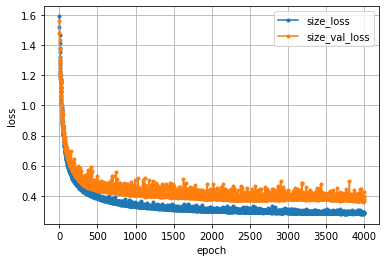

In [6]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [7]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(25, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [8]:
# 学習(位置)
epochs = 8000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/8000
8108/8108 [==============================] - 0s 50us/step - loss: 3.1414 - accuracy: 0.0757 - val_loss: 3.0759 - val_accuracy: 0.1080
Epoch 2/8000
8108/8108 [==============================] - 0s 34us/step - loss: 3.0575 - accuracy: 0.1119 - val_loss: 3.0106 - val_accuracy: 0.1219
Epoch 3/8000
8108/8108 [==============================] - 0s 32us/step - loss: 2.9948 - accuracy: 0.1307 - val_loss: 2.9399 - val_accuracy: 0.1465
Epoch 4/8000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9338 - accuracy: 0.1502 - val_loss: 2.8695 - val_accuracy: 0.1667
Epoch 5/8000
8108/8108 [==============================] - 0s 29us/step - loss: 2.8872 - accuracy: 0.1582 - val_loss: 2.8905 - val_accuracy: 0.1465
Epoch 6/8000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8469 - accuracy: 0.1637 - val_loss: 2.7749 - val_accuracy: 0.2309
Epoch 7/8000
8108/8108 [==============================] - 0s 30us/step

8108/8108 [==============================] - 0s 26us/step - loss: 2.1562 - accuracy: 0.3476 - val_loss: 2.1086 - val_accuracy: 0.3606
Epoch 57/8000
8108/8108 [==============================] - 0s 26us/step - loss: 2.1595 - accuracy: 0.3524 - val_loss: 2.1853 - val_accuracy: 0.3246
Epoch 58/8000
8108/8108 [==============================] - 0s 27us/step - loss: 2.1496 - accuracy: 0.3541 - val_loss: 2.0740 - val_accuracy: 0.4036
Epoch 59/8000
8108/8108 [==============================] - 0s 27us/step - loss: 2.1320 - accuracy: 0.3556 - val_loss: 2.0886 - val_accuracy: 0.3897
Epoch 60/8000
8108/8108 [==============================] - 0s 27us/step - loss: 2.1384 - accuracy: 0.3556 - val_loss: 2.1209 - val_accuracy: 0.3370
Epoch 61/8000
8108/8108 [==============================] - 0s 26us/step - loss: 2.1261 - accuracy: 0.3555 - val_loss: 2.1254 - val_accuracy: 0.3271
Epoch 62/8000
8108/8108 [==============================] - 0s 26us/step - loss: 2.1275 - accuracy: 0.3605 - val_loss: 2.0486 -

8108/8108 [==============================] - 0s 28us/step - loss: 1.9315 - accuracy: 0.4076 - val_loss: 1.8973 - val_accuracy: 0.4381
Epoch 112/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.9292 - accuracy: 0.4026 - val_loss: 1.9291 - val_accuracy: 0.3720
Epoch 113/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.9565 - accuracy: 0.3864 - val_loss: 1.9580 - val_accuracy: 0.3611
Epoch 114/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.9541 - accuracy: 0.3888 - val_loss: 1.9057 - val_accuracy: 0.4031
Epoch 115/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.9392 - accuracy: 0.3878 - val_loss: 1.9457 - val_accuracy: 0.4016
Epoch 116/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.9084 - accuracy: 0.4154 - val_loss: 1.9094 - val_accuracy: 0.4238
Epoch 117/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.9218 - accuracy: 0.4056 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.8553 - accuracy: 0.4071 - val_loss: 1.7775 - val_accuracy: 0.4716
Epoch 167/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8466 - accuracy: 0.4134 - val_loss: 1.7990 - val_accuracy: 0.4233
Epoch 168/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.8076 - accuracy: 0.4297 - val_loss: 1.7837 - val_accuracy: 0.4410
Epoch 169/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8241 - accuracy: 0.4261 - val_loss: 1.8511 - val_accuracy: 0.4420
Epoch 170/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8413 - accuracy: 0.4214 - val_loss: 1.8603 - val_accuracy: 0.3883
Epoch 171/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.8254 - accuracy: 0.4187 - val_loss: 1.8298 - val_accuracy: 0.4297
Epoch 172/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8282 - accuracy: 0.4096 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.7745 - accuracy: 0.4357 - val_loss: 1.7716 - val_accuracy: 0.4642
Epoch 222/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.7523 - accuracy: 0.4365 - val_loss: 1.7928 - val_accuracy: 0.4184
Epoch 223/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7591 - accuracy: 0.4392 - val_loss: 1.7543 - val_accuracy: 0.4642
Epoch 224/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.7672 - accuracy: 0.4286 - val_loss: 1.7613 - val_accuracy: 0.3947
Epoch 225/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.7343 - accuracy: 0.4467 - val_loss: 1.6746 - val_accuracy: 0.4933
Epoch 226/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7671 - accuracy: 0.4414 - val_loss: 1.7682 - val_accuracy: 0.4790
Epoch 227/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7566 - accuracy: 0.4302 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.6812 - accuracy: 0.4552 - val_loss: 1.6447 - val_accuracy: 0.4850
Epoch 277/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6996 - accuracy: 0.4396 - val_loss: 1.7016 - val_accuracy: 0.4356
Epoch 278/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6927 - accuracy: 0.4513 - val_loss: 1.7570 - val_accuracy: 0.4095
Epoch 279/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6960 - accuracy: 0.4478 - val_loss: 1.6737 - val_accuracy: 0.4484
Epoch 280/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6773 - accuracy: 0.4551 - val_loss: 1.6706 - val_accuracy: 0.4563
Epoch 281/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6713 - accuracy: 0.4577 - val_loss: 1.7578 - val_accuracy: 0.4198
Epoch 282/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.6819 - accuracy: 0.4577 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.6428 - accuracy: 0.4540 - val_loss: 1.6398 - val_accuracy: 0.4632
Epoch 332/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6259 - accuracy: 0.4747 - val_loss: 1.5936 - val_accuracy: 0.5052
Epoch 333/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6444 - accuracy: 0.4629 - val_loss: 1.6464 - val_accuracy: 0.4632
Epoch 334/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6655 - accuracy: 0.4577 - val_loss: 1.6722 - val_accuracy: 0.4332
Epoch 335/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6386 - accuracy: 0.4639 - val_loss: 1.6186 - val_accuracy: 0.4869
Epoch 336/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6302 - accuracy: 0.4630 - val_loss: 1.6735 - val_accuracy: 0.4391
Epoch 337/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.6180 - accuracy: 0.4718 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.6006 - accuracy: 0.4759 - val_loss: 1.5934 - val_accuracy: 0.4484
Epoch 387/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.6036 - accuracy: 0.4666 - val_loss: 1.6572 - val_accuracy: 0.4435
Epoch 388/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.6020 - accuracy: 0.4726 - val_loss: 1.6024 - val_accuracy: 0.4909
Epoch 389/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.6066 - accuracy: 0.4639 - val_loss: 1.5879 - val_accuracy: 0.4859
Epoch 390/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6028 - accuracy: 0.4644 - val_loss: 1.5853 - val_accuracy: 0.4771
Epoch 391/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6327 - accuracy: 0.4600 - val_loss: 1.6079 - val_accuracy: 0.4790
Epoch 392/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.6061 - accuracy: 0.4739 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.5775 - accuracy: 0.4746 - val_loss: 1.5748 - val_accuracy: 0.5146
Epoch 442/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5848 - accuracy: 0.4704 - val_loss: 1.6735 - val_accuracy: 0.4840
Epoch 443/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5781 - accuracy: 0.4706 - val_loss: 1.5508 - val_accuracy: 0.4859
Epoch 444/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.5607 - accuracy: 0.4782 - val_loss: 1.6190 - val_accuracy: 0.4435
Epoch 445/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5582 - accuracy: 0.4773 - val_loss: 1.6332 - val_accuracy: 0.4563
Epoch 446/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5420 - accuracy: 0.5036 - val_loss: 1.5223 - val_accuracy: 0.4963
Epoch 447/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5373 - accuracy: 0.4914 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.5402 - accuracy: 0.4783 - val_loss: 1.5886 - val_accuracy: 0.4687
Epoch 497/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5483 - accuracy: 0.4813 - val_loss: 1.5369 - val_accuracy: 0.5249
Epoch 498/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5493 - accuracy: 0.4824 - val_loss: 1.5863 - val_accuracy: 0.4632
Epoch 499/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5315 - accuracy: 0.4861 - val_loss: 1.5436 - val_accuracy: 0.4948
Epoch 500/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5216 - accuracy: 0.4904 - val_loss: 1.5187 - val_accuracy: 0.5195
Epoch 501/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5085 - accuracy: 0.4983 - val_loss: 1.5290 - val_accuracy: 0.5387
Epoch 502/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.5202 - accuracy: 0.4882 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4963 - accuracy: 0.4952 - val_loss: 1.4756 - val_accuracy: 0.5067
Epoch 552/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4871 - accuracy: 0.5027 - val_loss: 1.4896 - val_accuracy: 0.5190
Epoch 553/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4817 - accuracy: 0.4967 - val_loss: 1.4760 - val_accuracy: 0.5126
Epoch 554/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5098 - accuracy: 0.4985 - val_loss: 1.5214 - val_accuracy: 0.4692
Epoch 555/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5027 - accuracy: 0.4949 - val_loss: 1.4930 - val_accuracy: 0.5170
Epoch 556/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4963 - accuracy: 0.4979 - val_loss: 1.5173 - val_accuracy: 0.4805
Epoch 557/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4934 - accuracy: 0.5023 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.4703 - accuracy: 0.5065 - val_loss: 1.5356 - val_accuracy: 0.4825
Epoch 607/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4739 - accuracy: 0.5000 - val_loss: 1.4874 - val_accuracy: 0.4914
Epoch 608/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4516 - accuracy: 0.5097 - val_loss: 1.5005 - val_accuracy: 0.5091
Epoch 609/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4808 - accuracy: 0.4994 - val_loss: 1.5164 - val_accuracy: 0.4948
Epoch 610/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4743 - accuracy: 0.5062 - val_loss: 1.5081 - val_accuracy: 0.5081
Epoch 611/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4913 - accuracy: 0.4872 - val_loss: 1.5333 - val_accuracy: 0.4751
Epoch 612/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4454 - accuracy: 0.5116 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.4309 - accuracy: 0.5180 - val_loss: 1.4473 - val_accuracy: 0.5126
Epoch 662/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4271 - accuracy: 0.5085 - val_loss: 1.5189 - val_accuracy: 0.4716
Epoch 663/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4668 - accuracy: 0.5014 - val_loss: 1.5169 - val_accuracy: 0.4978
Epoch 664/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4428 - accuracy: 0.5006 - val_loss: 1.5489 - val_accuracy: 0.4795
Epoch 665/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4512 - accuracy: 0.4988 - val_loss: 1.5178 - val_accuracy: 0.5160
Epoch 666/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4368 - accuracy: 0.5058 - val_loss: 1.4844 - val_accuracy: 0.5141
Epoch 667/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.4417 - accuracy: 0.5089 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4243 - accuracy: 0.5120 - val_loss: 1.4455 - val_accuracy: 0.5190
Epoch 717/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4062 - accuracy: 0.5070 - val_loss: 1.4581 - val_accuracy: 0.5180
Epoch 718/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4210 - accuracy: 0.5155 - val_loss: 1.3991 - val_accuracy: 0.5220
Epoch 719/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4267 - accuracy: 0.5037 - val_loss: 1.4219 - val_accuracy: 0.5560
Epoch 720/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3925 - accuracy: 0.5186 - val_loss: 1.4633 - val_accuracy: 0.5096
Epoch 721/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4287 - accuracy: 0.5096 - val_loss: 1.4342 - val_accuracy: 0.5116
Epoch 722/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4450 - accuracy: 0.5033 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.4027 - accuracy: 0.5178 - val_loss: 1.4506 - val_accuracy: 0.4854
Epoch 772/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4070 - accuracy: 0.5142 - val_loss: 1.5103 - val_accuracy: 0.5037
Epoch 773/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.4417 - accuracy: 0.4861 - val_loss: 1.4723 - val_accuracy: 0.4919
Epoch 774/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3866 - accuracy: 0.5222 - val_loss: 1.4222 - val_accuracy: 0.5160
Epoch 775/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3882 - accuracy: 0.5253 - val_loss: 1.4890 - val_accuracy: 0.4840
Epoch 776/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4182 - accuracy: 0.5102 - val_loss: 1.4039 - val_accuracy: 0.5210
Epoch 777/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4060 - accuracy: 0.5170 - val_loss: 1.

8108/8108 [==============================] - 0s 29us/step - loss: 1.3939 - accuracy: 0.5144 - val_loss: 1.3788 - val_accuracy: 0.4983
Epoch 827/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3761 - accuracy: 0.5233 - val_loss: 1.3939 - val_accuracy: 0.5397
Epoch 828/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3898 - accuracy: 0.5189 - val_loss: 1.4578 - val_accuracy: 0.4825
Epoch 829/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3837 - accuracy: 0.5268 - val_loss: 1.3504 - val_accuracy: 0.5353
Epoch 830/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3805 - accuracy: 0.5275 - val_loss: 1.3850 - val_accuracy: 0.5624
Epoch 831/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3747 - accuracy: 0.5252 - val_loss: 1.4148 - val_accuracy: 0.4780
Epoch 832/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4009 - accuracy: 0.5152 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3637 - accuracy: 0.5332 - val_loss: 1.3892 - val_accuracy: 0.4983
Epoch 882/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3694 - accuracy: 0.5157 - val_loss: 1.4320 - val_accuracy: 0.4899
Epoch 883/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3756 - accuracy: 0.5260 - val_loss: 1.4180 - val_accuracy: 0.4993
Epoch 884/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3774 - accuracy: 0.5253 - val_loss: 1.3574 - val_accuracy: 0.5190
Epoch 885/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3657 - accuracy: 0.5237 - val_loss: 1.4610 - val_accuracy: 0.4909
Epoch 886/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3657 - accuracy: 0.5201 - val_loss: 1.4510 - val_accuracy: 0.5155
Epoch 887/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.3896 - accuracy: 0.5137 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.3591 - accuracy: 0.5229 - val_loss: 1.3452 - val_accuracy: 0.5338
Epoch 937/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3488 - accuracy: 0.5332 - val_loss: 1.3845 - val_accuracy: 0.5298
Epoch 938/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3369 - accuracy: 0.5407 - val_loss: 1.3792 - val_accuracy: 0.5313
Epoch 939/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3253 - accuracy: 0.5406 - val_loss: 1.3970 - val_accuracy: 0.5200
Epoch 940/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3353 - accuracy: 0.5402 - val_loss: 1.4165 - val_accuracy: 0.5096
Epoch 941/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3523 - accuracy: 0.5244 - val_loss: 1.3892 - val_accuracy: 0.5111
Epoch 942/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3718 - accuracy: 0.5213 - val_loss: 1.

8108/8108 [==============================] - 0s 43us/step - loss: 1.3440 - accuracy: 0.5205 - val_loss: 1.4739 - val_accuracy: 0.4815
Epoch 992/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3369 - accuracy: 0.5306 - val_loss: 1.3903 - val_accuracy: 0.5155
Epoch 993/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3224 - accuracy: 0.5477 - val_loss: 1.3963 - val_accuracy: 0.5165
Epoch 994/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.3509 - accuracy: 0.5254 - val_loss: 1.3590 - val_accuracy: 0.5313
Epoch 995/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3439 - accuracy: 0.5295 - val_loss: 1.3502 - val_accuracy: 0.5511
Epoch 996/8000
8108/8108 [==============================] - 0s 39us/step - loss: 1.3367 - accuracy: 0.5332 - val_loss: 1.4177 - val_accuracy: 0.5165
Epoch 997/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3628 - accuracy: 0.5278 - val_loss: 1.

Epoch 1046/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.3234 - accuracy: 0.5328 - val_loss: 1.3725 - val_accuracy: 0.5812
Epoch 1047/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.3016 - accuracy: 0.5495 - val_loss: 1.3742 - val_accuracy: 0.5190
Epoch 1048/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.3128 - accuracy: 0.5405 - val_loss: 1.4327 - val_accuracy: 0.4869
Epoch 1049/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3325 - accuracy: 0.5286 - val_loss: 1.3758 - val_accuracy: 0.5338
Epoch 1050/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3158 - accuracy: 0.5371 - val_loss: 1.3918 - val_accuracy: 0.4958
Epoch 1051/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3136 - accuracy: 0.5427 - val_loss: 1.4287 - val_accuracy: 0.5496
Epoch 1052/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.3386 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 1.3292 - accuracy: 0.5348 - val_loss: 1.3733 - val_accuracy: 0.5594
Epoch 1101/8000
8108/8108 [==============================] - 0s 42us/step - loss: 1.2944 - accuracy: 0.5470 - val_loss: 1.3937 - val_accuracy: 0.5165
Epoch 1102/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3313 - accuracy: 0.5371 - val_loss: 1.3326 - val_accuracy: 0.5427
Epoch 1103/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2899 - accuracy: 0.5469 - val_loss: 1.3641 - val_accuracy: 0.5471
Epoch 1104/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3104 - accuracy: 0.5406 - val_loss: 1.3813 - val_accuracy: 0.5269
Epoch 1105/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3156 - accuracy: 0.5355 - val_loss: 1.3677 - val_accuracy: 0.5121
Epoch 1106/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3035 - accuracy: 0.5408 - val_lo

Epoch 1155/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2987 - accuracy: 0.5492 - val_loss: 1.3783 - val_accuracy: 0.5057
Epoch 1156/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.3043 - accuracy: 0.5380 - val_loss: 1.3934 - val_accuracy: 0.5052
Epoch 1157/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.2821 - accuracy: 0.5520 - val_loss: 1.3949 - val_accuracy: 0.5328
Epoch 1158/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2973 - accuracy: 0.5385 - val_loss: 1.4607 - val_accuracy: 0.5141
Epoch 1159/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2884 - accuracy: 0.5455 - val_loss: 1.3435 - val_accuracy: 0.5244
Epoch 1160/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3092 - accuracy: 0.5393 - val_loss: 1.4105 - val_accuracy: 0.5368
Epoch 1161/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.3099 - accuracy:

8108/8108 [==============================] - 0s 40us/step - loss: 1.2925 - accuracy: 0.5403 - val_loss: 1.3748 - val_accuracy: 0.5200
Epoch 1210/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2724 - accuracy: 0.5534 - val_loss: 1.3436 - val_accuracy: 0.5382
Epoch 1211/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2773 - accuracy: 0.5513 - val_loss: 1.4074 - val_accuracy: 0.5210
Epoch 1212/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2803 - accuracy: 0.5509 - val_loss: 1.3406 - val_accuracy: 0.5550
Epoch 1213/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2729 - accuracy: 0.5601 - val_loss: 1.3460 - val_accuracy: 0.5155
Epoch 1214/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2702 - accuracy: 0.5512 - val_loss: 1.3310 - val_accuracy: 0.5604
Epoch 1215/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.2777 - accuracy: 0.5413 - val_lo

Epoch 1264/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2526 - accuracy: 0.5593 - val_loss: 1.3837 - val_accuracy: 0.5451
Epoch 1265/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2566 - accuracy: 0.5635 - val_loss: 1.3839 - val_accuracy: 0.5274
Epoch 1266/8000
8108/8108 [==============================] - 0s 54us/step - loss: 1.2614 - accuracy: 0.5629 - val_loss: 1.2967 - val_accuracy: 0.6034
Epoch 1267/8000
8108/8108 [==============================] - 0s 42us/step - loss: 1.2459 - accuracy: 0.5673 - val_loss: 1.3288 - val_accuracy: 0.5274
Epoch 1268/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2689 - accuracy: 0.5498 - val_loss: 1.3150 - val_accuracy: 0.5619
Epoch 1269/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2767 - accuracy: 0.5481 - val_loss: 1.4248 - val_accuracy: 0.4958
Epoch 1270/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2772 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 1.2674 - accuracy: 0.5445 - val_loss: 1.2980 - val_accuracy: 0.5812
Epoch 1319/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2644 - accuracy: 0.5516 - val_loss: 1.3331 - val_accuracy: 0.5244
Epoch 1320/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.2601 - accuracy: 0.5556 - val_loss: 1.3236 - val_accuracy: 0.5289
Epoch 1321/8000
8108/8108 [==============================] - 0s 41us/step - loss: 1.2499 - accuracy: 0.5693 - val_loss: 1.3365 - val_accuracy: 0.5279
Epoch 1322/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2356 - accuracy: 0.5620 - val_loss: 1.3169 - val_accuracy: 0.5614
Epoch 1323/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2516 - accuracy: 0.5537 - val_loss: 1.3210 - val_accuracy: 0.5358
Epoch 1324/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2771 - accuracy: 0.5455 - val_lo

Epoch 1373/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2367 - accuracy: 0.5656 - val_loss: 1.3332 - val_accuracy: 0.5535
Epoch 1374/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2597 - accuracy: 0.5543 - val_loss: 1.3135 - val_accuracy: 0.5244
Epoch 1375/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2550 - accuracy: 0.5541 - val_loss: 1.3137 - val_accuracy: 0.5382
Epoch 1376/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2628 - accuracy: 0.5498 - val_loss: 1.2854 - val_accuracy: 0.5831
Epoch 1377/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2565 - accuracy: 0.5560 - val_loss: 1.3113 - val_accuracy: 0.5412
Epoch 1378/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2387 - accuracy: 0.5654 - val_loss: 1.3457 - val_accuracy: 0.5565
Epoch 1379/8000
8108/8108 [==============================] - 0s 45us/step - loss: 1.2365 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 1.2469 - accuracy: 0.5646 - val_loss: 1.2992 - val_accuracy: 0.5446
Epoch 1428/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2406 - accuracy: 0.5583 - val_loss: 1.3713 - val_accuracy: 0.5155
Epoch 1429/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2387 - accuracy: 0.5670 - val_loss: 1.3196 - val_accuracy: 0.5767
Epoch 1430/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2266 - accuracy: 0.5701 - val_loss: 1.3192 - val_accuracy: 0.5491
Epoch 1431/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.2264 - accuracy: 0.5599 - val_loss: 1.3752 - val_accuracy: 0.5264
Epoch 1432/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2273 - accuracy: 0.5778 - val_loss: 1.3488 - val_accuracy: 0.5442
Epoch 1433/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2321 - accuracy: 0.5569 - val_lo

Epoch 1482/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.2808 - accuracy: 0.5424 - val_loss: 1.3033 - val_accuracy: 0.5585
Epoch 1483/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2150 - accuracy: 0.5722 - val_loss: 1.4579 - val_accuracy: 0.4756
Epoch 1484/8000
8108/8108 [==============================] - 0s 47us/step - loss: 1.2303 - accuracy: 0.5587 - val_loss: 1.2738 - val_accuracy: 0.5821
Epoch 1485/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.2220 - accuracy: 0.5724 - val_loss: 1.3498 - val_accuracy: 0.5427
Epoch 1486/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.2674 - accuracy: 0.5372 - val_loss: 1.3698 - val_accuracy: 0.5525
Epoch 1487/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2453 - accuracy: 0.5553 - val_loss: 1.3199 - val_accuracy: 0.5442
Epoch 1488/8000
8108/8108 [==============================] - 0s 48us/step - loss: 1.2238 - accuracy:

8108/8108 [==============================] - 0s 44us/step - loss: 1.2083 - accuracy: 0.5770 - val_loss: 1.2894 - val_accuracy: 0.5861
Epoch 1537/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2204 - accuracy: 0.5685 - val_loss: 1.2762 - val_accuracy: 0.5703
Epoch 1538/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.2210 - accuracy: 0.5661 - val_loss: 1.3758 - val_accuracy: 0.5205
Epoch 1539/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2197 - accuracy: 0.5666 - val_loss: 1.3158 - val_accuracy: 0.5979
Epoch 1540/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2286 - accuracy: 0.5673 - val_loss: 1.2943 - val_accuracy: 0.5703
Epoch 1541/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2162 - accuracy: 0.5701 - val_loss: 1.2921 - val_accuracy: 0.5530
Epoch 1542/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2261 - accuracy: 0.5561 - val_lo

Epoch 1591/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2107 - accuracy: 0.5652 - val_loss: 1.3207 - val_accuracy: 0.5639
Epoch 1592/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2006 - accuracy: 0.5672 - val_loss: 1.3166 - val_accuracy: 0.5437
Epoch 1593/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2080 - accuracy: 0.5714 - val_loss: 1.3690 - val_accuracy: 0.5565
Epoch 1594/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2188 - accuracy: 0.5705 - val_loss: 1.3020 - val_accuracy: 0.5511
Epoch 1595/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2168 - accuracy: 0.5675 - val_loss: 1.3047 - val_accuracy: 0.5836
Epoch 1596/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2238 - accuracy: 0.5685 - val_loss: 1.2624 - val_accuracy: 0.5841
Epoch 1597/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1993 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 1.2378 - accuracy: 0.5545 - val_loss: 1.3904 - val_accuracy: 0.5259
Epoch 1646/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2041 - accuracy: 0.5656 - val_loss: 1.3773 - val_accuracy: 0.5368
Epoch 1647/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1978 - accuracy: 0.5714 - val_loss: 1.2873 - val_accuracy: 0.5767
Epoch 1648/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2082 - accuracy: 0.5648 - val_loss: 1.3519 - val_accuracy: 0.5594
Epoch 1649/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1908 - accuracy: 0.5792 - val_loss: 1.3118 - val_accuracy: 0.5525
Epoch 1650/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2035 - accuracy: 0.5707 - val_loss: 1.3349 - val_accuracy: 0.5629
Epoch 1651/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2039 - accuracy: 0.5720 - val_lo

Epoch 1700/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1965 - accuracy: 0.5741 - val_loss: 1.2816 - val_accuracy: 0.5599
Epoch 1701/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1863 - accuracy: 0.5766 - val_loss: 1.2808 - val_accuracy: 0.5945
Epoch 1702/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1936 - accuracy: 0.5756 - val_loss: 1.3378 - val_accuracy: 0.5466
Epoch 1703/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1956 - accuracy: 0.5779 - val_loss: 1.2790 - val_accuracy: 0.5930
Epoch 1704/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1834 - accuracy: 0.5815 - val_loss: 1.2888 - val_accuracy: 0.5895
Epoch 1705/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1992 - accuracy: 0.5696 - val_loss: 1.2681 - val_accuracy: 0.5999
Epoch 1706/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.2052 - accuracy:

8108/8108 [==============================] - 0s 32us/step - loss: 1.1735 - accuracy: 0.5798 - val_loss: 1.3176 - val_accuracy: 0.5683
Epoch 1755/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1728 - accuracy: 0.5879 - val_loss: 1.3175 - val_accuracy: 0.5372
Epoch 1756/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1829 - accuracy: 0.5747 - val_loss: 1.3278 - val_accuracy: 0.5703
Epoch 1757/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.2203 - accuracy: 0.5598 - val_loss: 1.4229 - val_accuracy: 0.5363
Epoch 1758/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1830 - accuracy: 0.5730 - val_loss: 1.2819 - val_accuracy: 0.5984
Epoch 1759/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1822 - accuracy: 0.5745 - val_loss: 1.3204 - val_accuracy: 0.5451
Epoch 1760/8000
8108/8108 [==============================] - 0s 45us/step - loss: 1.1986 - accuracy: 0.5741 - val_lo

Epoch 1809/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1921 - accuracy: 0.5834 - val_loss: 1.2706 - val_accuracy: 0.5807
Epoch 1810/8000
8108/8108 [==============================] - 0s 56us/step - loss: 1.1867 - accuracy: 0.5720 - val_loss: 1.2532 - val_accuracy: 0.5629
Epoch 1811/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1881 - accuracy: 0.5633 - val_loss: 1.2596 - val_accuracy: 0.5807
Epoch 1812/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.1723 - accuracy: 0.5770 - val_loss: 1.2629 - val_accuracy: 0.5728
Epoch 1813/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1711 - accuracy: 0.5798 - val_loss: 1.3001 - val_accuracy: 0.5831
Epoch 1814/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.2252 - accuracy: 0.5623 - val_loss: 1.3242 - val_accuracy: 0.5264
Epoch 1815/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1780 - accuracy:

8108/8108 [==============================] - 0s 38us/step - loss: 1.1721 - accuracy: 0.5747 - val_loss: 1.3188 - val_accuracy: 0.5580
Epoch 1864/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1798 - accuracy: 0.5761 - val_loss: 1.3146 - val_accuracy: 0.5673
Epoch 1865/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1827 - accuracy: 0.5808 - val_loss: 1.2799 - val_accuracy: 0.5890
Epoch 1866/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1647 - accuracy: 0.5810 - val_loss: 1.3026 - val_accuracy: 0.5471
Epoch 1867/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1745 - accuracy: 0.5702 - val_loss: 1.2983 - val_accuracy: 0.5481
Epoch 1868/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1723 - accuracy: 0.5866 - val_loss: 1.3216 - val_accuracy: 0.5590
Epoch 1869/8000
8108/8108 [==============================] - 0s 49us/step - loss: 1.2029 - accuracy: 0.5691 - val_lo

Epoch 1918/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.1828 - accuracy: 0.5729 - val_loss: 1.3087 - val_accuracy: 0.5792
Epoch 1919/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1462 - accuracy: 0.5916 - val_loss: 1.2832 - val_accuracy: 0.5792
Epoch 1920/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1665 - accuracy: 0.5850 - val_loss: 1.2682 - val_accuracy: 0.6019
Epoch 1921/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1547 - accuracy: 0.5872 - val_loss: 1.2668 - val_accuracy: 0.5861
Epoch 1922/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1533 - accuracy: 0.5851 - val_loss: 1.3661 - val_accuracy: 0.5545
Epoch 1923/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1702 - accuracy: 0.5794 - val_loss: 1.2936 - val_accuracy: 0.5708
Epoch 1924/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1769 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 1.1751 - accuracy: 0.5818 - val_loss: 1.2816 - val_accuracy: 0.5728
Epoch 1973/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1582 - accuracy: 0.5866 - val_loss: 1.3146 - val_accuracy: 0.5545
Epoch 1974/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1786 - accuracy: 0.5740 - val_loss: 1.2345 - val_accuracy: 0.6048
Epoch 1975/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1694 - accuracy: 0.5757 - val_loss: 1.2573 - val_accuracy: 0.5964
Epoch 1976/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1702 - accuracy: 0.5714 - val_loss: 1.3143 - val_accuracy: 0.5723
Epoch 1977/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1459 - accuracy: 0.5846 - val_loss: 1.2747 - val_accuracy: 0.5678
Epoch 1978/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1591 - accuracy: 0.5876 - val_lo

Epoch 2027/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1538 - accuracy: 0.5835 - val_loss: 1.2651 - val_accuracy: 0.5807
Epoch 2028/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1759 - accuracy: 0.5699 - val_loss: 1.2641 - val_accuracy: 0.5777
Epoch 2029/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1843 - accuracy: 0.5709 - val_loss: 1.2467 - val_accuracy: 0.5960
Epoch 2030/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1379 - accuracy: 0.5942 - val_loss: 1.2136 - val_accuracy: 0.5940
Epoch 2031/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1377 - accuracy: 0.6040 - val_loss: 1.2478 - val_accuracy: 0.5565
Epoch 2032/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1602 - accuracy: 0.5813 - val_loss: 1.2719 - val_accuracy: 0.5747
Epoch 2033/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1579 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 1.1506 - accuracy: 0.5860 - val_loss: 1.2476 - val_accuracy: 0.5688
Epoch 2082/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.1159 - accuracy: 0.6041 - val_loss: 1.2936 - val_accuracy: 0.5575
Epoch 2083/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.1392 - accuracy: 0.5839 - val_loss: 1.3311 - val_accuracy: 0.5752
Epoch 2084/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.1569 - accuracy: 0.5867 - val_loss: 1.2518 - val_accuracy: 0.5831
Epoch 2085/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.1414 - accuracy: 0.5914 - val_loss: 1.2740 - val_accuracy: 0.5777
Epoch 2086/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1698 - accuracy: 0.5718 - val_loss: 1.2346 - val_accuracy: 0.5920
Epoch 2087/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1383 - accuracy: 0.5876 - val_lo

Epoch 2136/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.1466 - accuracy: 0.5886 - val_loss: 1.2709 - val_accuracy: 0.5930
Epoch 2137/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1531 - accuracy: 0.5799 - val_loss: 1.2698 - val_accuracy: 0.5881
Epoch 2138/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1695 - accuracy: 0.5745 - val_loss: 1.3657 - val_accuracy: 0.5530
Epoch 2139/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1585 - accuracy: 0.5823 - val_loss: 1.3256 - val_accuracy: 0.5698
Epoch 2140/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1318 - accuracy: 0.5935 - val_loss: 1.2596 - val_accuracy: 0.5812
Epoch 2141/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1429 - accuracy: 0.5863 - val_loss: 1.2552 - val_accuracy: 0.5807
Epoch 2142/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1492 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 1.1327 - accuracy: 0.5951 - val_loss: 1.2735 - val_accuracy: 0.5624
Epoch 2191/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1420 - accuracy: 0.5830 - val_loss: 1.2523 - val_accuracy: 0.5762
Epoch 2192/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1405 - accuracy: 0.5863 - val_loss: 1.2497 - val_accuracy: 0.5964
Epoch 2193/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1358 - accuracy: 0.5892 - val_loss: 1.2613 - val_accuracy: 0.5550
Epoch 2194/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1445 - accuracy: 0.5846 - val_loss: 1.3000 - val_accuracy: 0.5481
Epoch 2195/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1410 - accuracy: 0.5861 - val_loss: 1.2196 - val_accuracy: 0.6112
Epoch 2196/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1472 - accuracy: 0.5853 - val_lo

Epoch 2245/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1098 - accuracy: 0.6056 - val_loss: 1.2352 - val_accuracy: 0.6053
Epoch 2246/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1291 - accuracy: 0.5909 - val_loss: 1.3042 - val_accuracy: 0.5540
Epoch 2247/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1632 - accuracy: 0.5746 - val_loss: 1.2730 - val_accuracy: 0.5614
Epoch 2248/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1213 - accuracy: 0.5988 - val_loss: 1.3197 - val_accuracy: 0.5442
Epoch 2249/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1261 - accuracy: 0.5931 - val_loss: 1.2721 - val_accuracy: 0.6019
Epoch 2250/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1349 - accuracy: 0.5886 - val_loss: 1.2784 - val_accuracy: 0.5742
Epoch 2251/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1272 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 1.1234 - accuracy: 0.5973 - val_loss: 1.2478 - val_accuracy: 0.6038
Epoch 2300/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1264 - accuracy: 0.5923 - val_loss: 1.2821 - val_accuracy: 0.5881
Epoch 2301/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1359 - accuracy: 0.5879 - val_loss: 1.2605 - val_accuracy: 0.5723
Epoch 2302/8000
8108/8108 [==============================] - 0s 39us/step - loss: 1.1249 - accuracy: 0.5950 - val_loss: 1.2306 - val_accuracy: 0.6108
Epoch 2303/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.1318 - accuracy: 0.5865 - val_loss: 1.2600 - val_accuracy: 0.5757
Epoch 2304/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1223 - accuracy: 0.5951 - val_loss: 1.2801 - val_accuracy: 0.5890
Epoch 2305/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1417 - accuracy: 0.5850 - val_lo

Epoch 2354/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1211 - accuracy: 0.5941 - val_loss: 1.2467 - val_accuracy: 0.5772
Epoch 2355/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1143 - accuracy: 0.5910 - val_loss: 1.2191 - val_accuracy: 0.6211
Epoch 2356/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1118 - accuracy: 0.6047 - val_loss: 1.2762 - val_accuracy: 0.5668
Epoch 2357/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1433 - accuracy: 0.5840 - val_loss: 1.2647 - val_accuracy: 0.5851
Epoch 2358/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1226 - accuracy: 0.5905 - val_loss: 1.2323 - val_accuracy: 0.5915
Epoch 2359/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1391 - accuracy: 0.5850 - val_loss: 1.1917 - val_accuracy: 0.6122
Epoch 2360/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1299 - accuracy:

8108/8108 [==============================] - 0s 35us/step - loss: 1.0979 - accuracy: 0.6004 - val_loss: 1.2630 - val_accuracy: 0.5634
Epoch 2409/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1271 - accuracy: 0.5932 - val_loss: 1.2588 - val_accuracy: 0.5826
Epoch 2410/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1066 - accuracy: 0.6038 - val_loss: 1.2941 - val_accuracy: 0.5520
Epoch 2411/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0913 - accuracy: 0.6110 - val_loss: 1.2222 - val_accuracy: 0.5866
Epoch 2412/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1282 - accuracy: 0.5958 - val_loss: 1.2681 - val_accuracy: 0.5974
Epoch 2413/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1147 - accuracy: 0.5974 - val_loss: 1.3051 - val_accuracy: 0.5876
Epoch 2414/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1133 - accuracy: 0.5992 - val_lo

Epoch 2463/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1442 - accuracy: 0.5863 - val_loss: 1.3016 - val_accuracy: 0.6063
Epoch 2464/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1024 - accuracy: 0.6006 - val_loss: 1.2270 - val_accuracy: 0.6354
Epoch 2465/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0907 - accuracy: 0.6111 - val_loss: 1.2332 - val_accuracy: 0.5940
Epoch 2466/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0963 - accuracy: 0.5998 - val_loss: 1.2802 - val_accuracy: 0.5604
Epoch 2467/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.1005 - accuracy: 0.5992 - val_loss: 1.2842 - val_accuracy: 0.5757
Epoch 2468/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0937 - accuracy: 0.6035 - val_loss: 1.3267 - val_accuracy: 0.5836
Epoch 2469/8000
8108/8108 [==============================] - 0s 39us/step - loss: 1.1108 - accuracy:

8108/8108 [==============================] - 0s 39us/step - loss: 1.0963 - accuracy: 0.6048 - val_loss: 1.2553 - val_accuracy: 0.5984
Epoch 2518/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0724 - accuracy: 0.6184 - val_loss: 1.2896 - val_accuracy: 0.5585
Epoch 2519/8000
8108/8108 [==============================] - 0s 43us/step - loss: 1.1090 - accuracy: 0.5997 - val_loss: 1.2665 - val_accuracy: 0.6112
Epoch 2520/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0727 - accuracy: 0.6129 - val_loss: 1.2744 - val_accuracy: 0.5960
Epoch 2521/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0917 - accuracy: 0.6021 - val_loss: 1.2738 - val_accuracy: 0.6226
Epoch 2522/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.1174 - accuracy: 0.5898 - val_loss: 1.3392 - val_accuracy: 0.5392
Epoch 2523/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1540 - accuracy: 0.5729 - val_lo

Epoch 2572/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0963 - accuracy: 0.6020 - val_loss: 1.2967 - val_accuracy: 0.5678
Epoch 2573/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1002 - accuracy: 0.6021 - val_loss: 1.3114 - val_accuracy: 0.5688
Epoch 2574/8000
8108/8108 [==============================] - 0s 44us/step - loss: 1.1172 - accuracy: 0.5873 - val_loss: 1.2584 - val_accuracy: 0.5881
Epoch 2575/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0860 - accuracy: 0.6080 - val_loss: 1.2403 - val_accuracy: 0.6389
Epoch 2576/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0924 - accuracy: 0.5992 - val_loss: 1.2631 - val_accuracy: 0.5910
Epoch 2577/8000
8108/8108 [==============================] - 0s 49us/step - loss: 1.1017 - accuracy: 0.6045 - val_loss: 1.2954 - val_accuracy: 0.6117
Epoch 2578/8000
8108/8108 [==============================] - 0s 47us/step - loss: 1.1295 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 1.1014 - accuracy: 0.6066 - val_loss: 1.3052 - val_accuracy: 0.5585
Epoch 2627/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.1063 - accuracy: 0.5993 - val_loss: 1.1861 - val_accuracy: 0.6315
Epoch 2628/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0705 - accuracy: 0.6216 - val_loss: 1.3211 - val_accuracy: 0.5747
Epoch 2629/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1159 - accuracy: 0.5963 - val_loss: 1.2848 - val_accuracy: 0.5718
Epoch 2630/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0915 - accuracy: 0.5997 - val_loss: 1.2538 - val_accuracy: 0.5900
Epoch 2631/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0962 - accuracy: 0.5979 - val_loss: 1.3087 - val_accuracy: 0.5585
Epoch 2632/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1097 - accuracy: 0.5887 - val_lo

Epoch 2681/8000
8108/8108 [==============================] - 0s 43us/step - loss: 1.0852 - accuracy: 0.6072 - val_loss: 1.2763 - val_accuracy: 0.5836
Epoch 2682/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0842 - accuracy: 0.6153 - val_loss: 1.2216 - val_accuracy: 0.6093
Epoch 2683/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0935 - accuracy: 0.6034 - val_loss: 1.2833 - val_accuracy: 0.5950
Epoch 2684/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1195 - accuracy: 0.5914 - val_loss: 1.2390 - val_accuracy: 0.5890
Epoch 2685/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.1081 - accuracy: 0.5882 - val_loss: 1.2585 - val_accuracy: 0.5974
Epoch 2686/8000
8108/8108 [==============================] - 0s 41us/step - loss: 1.1097 - accuracy: 0.6008 - val_loss: 1.2198 - val_accuracy: 0.5876
Epoch 2687/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.1005 - accuracy:

8108/8108 [==============================] - 0s 33us/step - loss: 1.0706 - accuracy: 0.6148 - val_loss: 1.2525 - val_accuracy: 0.5964
Epoch 2736/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.1021 - accuracy: 0.6008 - val_loss: 1.3347 - val_accuracy: 0.6034
Epoch 2737/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0951 - accuracy: 0.6021 - val_loss: 1.2441 - val_accuracy: 0.6034
Epoch 2738/8000
8108/8108 [==============================] - 0s 39us/step - loss: 1.1177 - accuracy: 0.5888 - val_loss: 1.2917 - val_accuracy: 0.5841
Epoch 2739/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0857 - accuracy: 0.6109 - val_loss: 1.2209 - val_accuracy: 0.6305
Epoch 2740/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0733 - accuracy: 0.6180 - val_loss: 1.2387 - val_accuracy: 0.6117
Epoch 2741/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0774 - accuracy: 0.6132 - val_lo

Epoch 2790/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0961 - accuracy: 0.6053 - val_loss: 1.2734 - val_accuracy: 0.5673
Epoch 2791/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1184 - accuracy: 0.5945 - val_loss: 1.2272 - val_accuracy: 0.5984
Epoch 2792/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1309 - accuracy: 0.5777 - val_loss: 1.4270 - val_accuracy: 0.5303
Epoch 2793/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.1303 - accuracy: 0.5926 - val_loss: 1.2623 - val_accuracy: 0.6083
Epoch 2794/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0982 - accuracy: 0.6027 - val_loss: 1.2819 - val_accuracy: 0.5728
Epoch 2795/8000
8108/8108 [==============================] - 0s 50us/step - loss: 1.0705 - accuracy: 0.6133 - val_loss: 1.2198 - val_accuracy: 0.6043
Epoch 2796/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0825 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 1.1053 - accuracy: 0.5921 - val_loss: 1.2459 - val_accuracy: 0.6053
Epoch 2845/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.1098 - accuracy: 0.5988 - val_loss: 1.2521 - val_accuracy: 0.5738
Epoch 2846/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0861 - accuracy: 0.6030 - val_loss: 1.2083 - val_accuracy: 0.6246
Epoch 2847/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0634 - accuracy: 0.6157 - val_loss: 1.2290 - val_accuracy: 0.6201
Epoch 2848/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0855 - accuracy: 0.6051 - val_loss: 1.2711 - val_accuracy: 0.5747
Epoch 2849/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0705 - accuracy: 0.6094 - val_loss: 1.2460 - val_accuracy: 0.6270
Epoch 2850/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0641 - accuracy: 0.6175 - val_lo

Epoch 2899/8000
8108/8108 [==============================] - 0s 49us/step - loss: 1.0721 - accuracy: 0.6057 - val_loss: 1.2738 - val_accuracy: 0.5580
Epoch 2900/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0834 - accuracy: 0.6035 - val_loss: 1.2676 - val_accuracy: 0.6029
Epoch 2901/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0944 - accuracy: 0.6010 - val_loss: 1.2463 - val_accuracy: 0.5826
Epoch 2902/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0794 - accuracy: 0.6172 - val_loss: 1.2282 - val_accuracy: 0.6043
Epoch 2903/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0570 - accuracy: 0.6167 - val_loss: 1.2634 - val_accuracy: 0.6019
Epoch 2904/8000
8108/8108 [==============================] - 0s 49us/step - loss: 1.1013 - accuracy: 0.5989 - val_loss: 1.3826 - val_accuracy: 0.5664
Epoch 2905/8000
8108/8108 [==============================] - 0s 51us/step - loss: 1.0746 - accuracy:

8108/8108 [==============================] - 0s 35us/step - loss: 1.0787 - accuracy: 0.6020 - val_loss: 1.2718 - val_accuracy: 0.5831
Epoch 2954/8000
8108/8108 [==============================] - 0s 41us/step - loss: 1.0759 - accuracy: 0.6138 - val_loss: 1.2513 - val_accuracy: 0.5876
Epoch 2955/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0795 - accuracy: 0.6082 - val_loss: 1.2786 - val_accuracy: 0.5905
Epoch 2956/8000
8108/8108 [==============================] - 0s 41us/step - loss: 1.0864 - accuracy: 0.6105 - val_loss: 1.2279 - val_accuracy: 0.5895
Epoch 2957/8000
8108/8108 [==============================] - 0s 50us/step - loss: 1.0897 - accuracy: 0.6022 - val_loss: 1.2552 - val_accuracy: 0.6048
Epoch 2958/8000
8108/8108 [==============================] - 0s 39us/step - loss: 1.0874 - accuracy: 0.6024 - val_loss: 1.3041 - val_accuracy: 0.5599
Epoch 2959/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.0813 - accuracy: 0.5994 - val_lo

Epoch 3008/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0652 - accuracy: 0.6094 - val_loss: 1.1854 - val_accuracy: 0.6364
Epoch 3009/8000
8108/8108 [==============================] - 0s 43us/step - loss: 1.0833 - accuracy: 0.6019 - val_loss: 1.2233 - val_accuracy: 0.6068
Epoch 3010/8000
8108/8108 [==============================] - 0s 40us/step - loss: 1.0591 - accuracy: 0.6079 - val_loss: 1.2878 - val_accuracy: 0.5673
Epoch 3011/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0642 - accuracy: 0.6053 - val_loss: 1.2347 - val_accuracy: 0.6088
Epoch 3012/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0471 - accuracy: 0.6235 - val_loss: 1.2218 - val_accuracy: 0.5920
Epoch 3013/8000
8108/8108 [==============================] - 0s 48us/step - loss: 1.0672 - accuracy: 0.6087 - val_loss: 1.2609 - val_accuracy: 0.6029
Epoch 3014/8000
8108/8108 [==============================] - 0s 43us/step - loss: 1.0769 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 1.0741 - accuracy: 0.6067 - val_loss: 1.2878 - val_accuracy: 0.5782
Epoch 3063/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0655 - accuracy: 0.6119 - val_loss: 1.2606 - val_accuracy: 0.6063
Epoch 3064/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0461 - accuracy: 0.6228 - val_loss: 1.2759 - val_accuracy: 0.5821
Epoch 3065/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0766 - accuracy: 0.6109 - val_loss: 1.2713 - val_accuracy: 0.6137
Epoch 3066/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0736 - accuracy: 0.6120 - val_loss: 1.2505 - val_accuracy: 0.6034
Epoch 3067/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0838 - accuracy: 0.6035 - val_loss: 1.2120 - val_accuracy: 0.6300
Epoch 3068/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0648 - accuracy: 0.6094 - val_lo

Epoch 3117/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0515 - accuracy: 0.6148 - val_loss: 1.2480 - val_accuracy: 0.6127
Epoch 3118/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0507 - accuracy: 0.6159 - val_loss: 1.2942 - val_accuracy: 0.5757
Epoch 3119/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0640 - accuracy: 0.6125 - val_loss: 1.2863 - val_accuracy: 0.5757
Epoch 3120/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0693 - accuracy: 0.6116 - val_loss: 1.1968 - val_accuracy: 0.6058
Epoch 3121/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0624 - accuracy: 0.6125 - val_loss: 1.2603 - val_accuracy: 0.5866
Epoch 3122/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0698 - accuracy: 0.6098 - val_loss: 1.2547 - val_accuracy: 0.5861
Epoch 3123/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0377 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 1.0700 - accuracy: 0.6084 - val_loss: 1.2495 - val_accuracy: 0.5861
Epoch 3172/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0625 - accuracy: 0.6110 - val_loss: 1.3416 - val_accuracy: 0.5945
Epoch 3173/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0607 - accuracy: 0.6110 - val_loss: 1.2586 - val_accuracy: 0.5925
Epoch 3174/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0582 - accuracy: 0.6089 - val_loss: 1.2552 - val_accuracy: 0.6117
Epoch 3175/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0414 - accuracy: 0.6275 - val_loss: 1.2605 - val_accuracy: 0.6048
Epoch 3176/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0870 - accuracy: 0.6061 - val_loss: 1.1919 - val_accuracy: 0.6334
Epoch 3177/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0590 - accuracy: 0.6055 - val_lo

Epoch 3226/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0604 - accuracy: 0.6071 - val_loss: 1.2100 - val_accuracy: 0.5955
Epoch 3227/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0731 - accuracy: 0.6153 - val_loss: 1.3018 - val_accuracy: 0.5782
Epoch 3228/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0629 - accuracy: 0.6114 - val_loss: 1.2317 - val_accuracy: 0.6147
Epoch 3229/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0521 - accuracy: 0.6152 - val_loss: 1.2061 - val_accuracy: 0.6482
Epoch 3230/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0715 - accuracy: 0.6101 - val_loss: 1.2820 - val_accuracy: 0.5930
Epoch 3231/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0398 - accuracy: 0.6293 - val_loss: 1.1964 - val_accuracy: 0.6463
Epoch 3232/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0609 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 1.0802 - accuracy: 0.5999 - val_loss: 1.2538 - val_accuracy: 0.5772
Epoch 3281/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0377 - accuracy: 0.6228 - val_loss: 1.1744 - val_accuracy: 0.6423
Epoch 3282/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0262 - accuracy: 0.6256 - val_loss: 1.1872 - val_accuracy: 0.6147
Epoch 3283/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0348 - accuracy: 0.6243 - val_loss: 1.2290 - val_accuracy: 0.6182
Epoch 3284/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0443 - accuracy: 0.6172 - val_loss: 1.2287 - val_accuracy: 0.5826
Epoch 3285/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0379 - accuracy: 0.6219 - val_loss: 1.2434 - val_accuracy: 0.5866
Epoch 3286/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0901 - accuracy: 0.6058 - val_lo

Epoch 3335/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0550 - accuracy: 0.6117 - val_loss: 1.1774 - val_accuracy: 0.6492
Epoch 3336/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0276 - accuracy: 0.6304 - val_loss: 1.2510 - val_accuracy: 0.5974
Epoch 3337/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0396 - accuracy: 0.6221 - val_loss: 1.1963 - val_accuracy: 0.6108
Epoch 3338/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0255 - accuracy: 0.6281 - val_loss: 1.2749 - val_accuracy: 0.5752
Epoch 3339/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0377 - accuracy: 0.6230 - val_loss: 1.2224 - val_accuracy: 0.6098
Epoch 3340/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0354 - accuracy: 0.6337 - val_loss: 1.2071 - val_accuracy: 0.6280
Epoch 3341/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0291 - accuracy:

8108/8108 [==============================] - 0s 33us/step - loss: 1.0479 - accuracy: 0.6253 - val_loss: 1.2023 - val_accuracy: 0.6270
Epoch 3390/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0411 - accuracy: 0.6169 - val_loss: 1.2336 - val_accuracy: 0.6443
Epoch 3391/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0480 - accuracy: 0.6173 - val_loss: 1.2966 - val_accuracy: 0.5895
Epoch 3392/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0513 - accuracy: 0.6132 - val_loss: 1.2974 - val_accuracy: 0.5816
Epoch 3393/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0482 - accuracy: 0.6209 - val_loss: 1.2756 - val_accuracy: 0.5930
Epoch 3394/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0529 - accuracy: 0.6127 - val_loss: 1.2001 - val_accuracy: 0.6330
Epoch 3395/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0557 - accuracy: 0.6133 - val_lo

Epoch 3444/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0399 - accuracy: 0.6204 - val_loss: 1.1921 - val_accuracy: 0.6162
Epoch 3445/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0474 - accuracy: 0.6198 - val_loss: 1.2202 - val_accuracy: 0.6265
Epoch 3446/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0387 - accuracy: 0.6215 - val_loss: 1.1828 - val_accuracy: 0.6172
Epoch 3447/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0389 - accuracy: 0.6223 - val_loss: 1.2184 - val_accuracy: 0.6379
Epoch 3448/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0309 - accuracy: 0.6219 - val_loss: 1.2491 - val_accuracy: 0.5905
Epoch 3449/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0604 - accuracy: 0.6025 - val_loss: 1.2207 - val_accuracy: 0.6127
Epoch 3450/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0475 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 1.0569 - accuracy: 0.6072 - val_loss: 1.2350 - val_accuracy: 0.6137
Epoch 3499/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0227 - accuracy: 0.6260 - val_loss: 1.2026 - val_accuracy: 0.6162
Epoch 3500/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0339 - accuracy: 0.6301 - val_loss: 1.2149 - val_accuracy: 0.6330
Epoch 3501/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0379 - accuracy: 0.6272 - val_loss: 1.2250 - val_accuracy: 0.6034
Epoch 3502/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0260 - accuracy: 0.6278 - val_loss: 1.2277 - val_accuracy: 0.5960
Epoch 3503/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0516 - accuracy: 0.6136 - val_loss: 1.2391 - val_accuracy: 0.6048
Epoch 3504/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0517 - accuracy: 0.6157 - val_lo

Epoch 3553/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0406 - accuracy: 0.6226 - val_loss: 1.2608 - val_accuracy: 0.5851
Epoch 3554/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0683 - accuracy: 0.6082 - val_loss: 1.2797 - val_accuracy: 0.5762
Epoch 3555/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0220 - accuracy: 0.6354 - val_loss: 1.2241 - val_accuracy: 0.5945
Epoch 3556/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0343 - accuracy: 0.6228 - val_loss: 1.1825 - val_accuracy: 0.6478
Epoch 3557/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0323 - accuracy: 0.6221 - val_loss: 1.2839 - val_accuracy: 0.5876
Epoch 3558/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0326 - accuracy: 0.6222 - val_loss: 1.2490 - val_accuracy: 0.5812
Epoch 3559/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0391 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 1.0587 - accuracy: 0.6126 - val_loss: 1.2183 - val_accuracy: 0.6083
Epoch 3608/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0219 - accuracy: 0.6279 - val_loss: 1.2661 - val_accuracy: 0.5836
Epoch 3609/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0228 - accuracy: 0.6312 - val_loss: 1.2000 - val_accuracy: 0.6216
Epoch 3610/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0315 - accuracy: 0.6222 - val_loss: 1.2738 - val_accuracy: 0.6132
Epoch 3611/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0613 - accuracy: 0.6043 - val_loss: 1.2486 - val_accuracy: 0.6182
Epoch 3612/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0217 - accuracy: 0.6231 - val_loss: 1.2201 - val_accuracy: 0.6098
Epoch 3613/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0374 - accuracy: 0.6221 - val_lo

Epoch 3662/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0192 - accuracy: 0.6338 - val_loss: 1.1786 - val_accuracy: 0.6231
Epoch 3663/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0481 - accuracy: 0.6159 - val_loss: 1.1930 - val_accuracy: 0.6137
Epoch 3664/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0175 - accuracy: 0.6264 - val_loss: 1.1833 - val_accuracy: 0.6152
Epoch 3665/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0026 - accuracy: 0.6380 - val_loss: 1.2108 - val_accuracy: 0.6315
Epoch 3666/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0384 - accuracy: 0.6220 - val_loss: 1.2177 - val_accuracy: 0.6103
Epoch 3667/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0278 - accuracy: 0.6215 - val_loss: 1.2889 - val_accuracy: 0.5767
Epoch 3668/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0309 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 1.0043 - accuracy: 0.6385 - val_loss: 1.2042 - val_accuracy: 0.6162
Epoch 3717/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0054 - accuracy: 0.6362 - val_loss: 1.1749 - val_accuracy: 0.6117
Epoch 3718/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0013 - accuracy: 0.6344 - val_loss: 1.1973 - val_accuracy: 0.6122
Epoch 3719/8000
8108/8108 [==============================] - 0s 37us/step - loss: 1.0224 - accuracy: 0.6277 - val_loss: 1.2452 - val_accuracy: 0.5807
Epoch 3720/8000
8108/8108 [==============================] - 0s 48us/step - loss: 1.0232 - accuracy: 0.6252 - val_loss: 1.1432 - val_accuracy: 0.6497
Epoch 3721/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0254 - accuracy: 0.6279 - val_loss: 1.2405 - val_accuracy: 0.5876
Epoch 3722/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0379 - accuracy: 0.6156 - val_lo

Epoch 3771/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0236 - accuracy: 0.6286 - val_loss: 1.1954 - val_accuracy: 0.6083
Epoch 3772/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0315 - accuracy: 0.6222 - val_loss: 1.2331 - val_accuracy: 0.5821
Epoch 3773/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0229 - accuracy: 0.6320 - val_loss: 1.1675 - val_accuracy: 0.6182
Epoch 3774/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0519 - accuracy: 0.6108 - val_loss: 1.2743 - val_accuracy: 0.5866
Epoch 3775/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9996 - accuracy: 0.6452 - val_loss: 1.1762 - val_accuracy: 0.6231
Epoch 3776/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0472 - accuracy: 0.6210 - val_loss: 1.1419 - val_accuracy: 0.6818
Epoch 3777/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0080 - accuracy:

8108/8108 [==============================] - 0s 36us/step - loss: 1.0031 - accuracy: 0.6311 - val_loss: 1.1669 - val_accuracy: 0.6167
Epoch 3826/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0018 - accuracy: 0.6339 - val_loss: 1.1544 - val_accuracy: 0.6162
Epoch 3827/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0166 - accuracy: 0.6309 - val_loss: 1.1791 - val_accuracy: 0.6024
Epoch 3828/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0287 - accuracy: 0.6179 - val_loss: 1.1837 - val_accuracy: 0.5935
Epoch 3829/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0096 - accuracy: 0.6355 - val_loss: 1.2007 - val_accuracy: 0.5821
Epoch 3830/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9986 - accuracy: 0.6317 - val_loss: 1.2295 - val_accuracy: 0.6344
Epoch 3831/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0209 - accuracy: 0.6370 - val_lo

Epoch 3880/8000
8108/8108 [==============================] - 0s 35us/step - loss: 1.0220 - accuracy: 0.6235 - val_loss: 1.1780 - val_accuracy: 0.6093
Epoch 3881/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9996 - accuracy: 0.6317 - val_loss: 1.1574 - val_accuracy: 0.6320
Epoch 3882/8000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9991 - accuracy: 0.6336 - val_loss: 1.1588 - val_accuracy: 0.6226
Epoch 3883/8000
8108/8108 [==============================] - 0s 42us/step - loss: 1.0061 - accuracy: 0.6330 - val_loss: 1.2058 - val_accuracy: 0.5950
Epoch 3884/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0295 - accuracy: 0.6201 - val_loss: 1.1700 - val_accuracy: 0.6053
Epoch 3885/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0254 - accuracy: 0.6180 - val_loss: 1.1614 - val_accuracy: 0.6068
Epoch 3886/8000
8108/8108 [==============================] - 0s 46us/step - loss: 1.0340 - accuracy:

8108/8108 [==============================] - 0s 45us/step - loss: 1.0143 - accuracy: 0.6293 - val_loss: 1.1837 - val_accuracy: 0.6137
Epoch 3935/8000
8108/8108 [==============================] - 0s 52us/step - loss: 1.0153 - accuracy: 0.6294 - val_loss: 1.2266 - val_accuracy: 0.5733
Epoch 3936/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0335 - accuracy: 0.6203 - val_loss: 1.1232 - val_accuracy: 0.6196
Epoch 3937/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0019 - accuracy: 0.6392 - val_loss: 1.1244 - val_accuracy: 0.6241
Epoch 3938/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9959 - accuracy: 0.6385 - val_loss: 1.1207 - val_accuracy: 0.6260
Epoch 3939/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0002 - accuracy: 0.6328 - val_loss: 1.0969 - val_accuracy: 0.6389
Epoch 3940/8000
8108/8108 [==============================] - 0s 38us/step - loss: 1.0171 - accuracy: 0.6293 - val_lo

Epoch 3989/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0297 - accuracy: 0.6169 - val_loss: 1.1642 - val_accuracy: 0.6216
Epoch 3990/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0185 - accuracy: 0.6264 - val_loss: 1.1520 - val_accuracy: 0.5945
Epoch 3991/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9961 - accuracy: 0.6338 - val_loss: 1.1399 - val_accuracy: 0.6191
Epoch 3992/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0265 - accuracy: 0.6201 - val_loss: 1.1805 - val_accuracy: 0.6009
Epoch 3993/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0383 - accuracy: 0.6191 - val_loss: 1.1168 - val_accuracy: 0.6344
Epoch 3994/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9883 - accuracy: 0.6360 - val_loss: 1.1640 - val_accuracy: 0.6285
Epoch 3995/8000
8108/8108 [==============================] - 0s 37us/step - loss: 0.9949 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 1.0119 - accuracy: 0.6256 - val_loss: 1.2412 - val_accuracy: 0.5905
Epoch 4044/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0273 - accuracy: 0.6226 - val_loss: 1.1498 - val_accuracy: 0.6241
Epoch 4045/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9837 - accuracy: 0.6397 - val_loss: 1.1422 - val_accuracy: 0.6186
Epoch 4046/8000
8108/8108 [==============================] - 0s 32us/step - loss: 1.0222 - accuracy: 0.6164 - val_loss: 1.1703 - val_accuracy: 0.6211
Epoch 4047/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9823 - accuracy: 0.6507 - val_loss: 1.1635 - val_accuracy: 0.6004
Epoch 4048/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0033 - accuracy: 0.6320 - val_loss: 1.2213 - val_accuracy: 0.5678
Epoch 4049/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9905 - accuracy: 0.6469 - val_lo

Epoch 4098/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0129 - accuracy: 0.6268 - val_loss: 1.1225 - val_accuracy: 0.6334
Epoch 4099/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9917 - accuracy: 0.6401 - val_loss: 1.1403 - val_accuracy: 0.6191
Epoch 4100/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9930 - accuracy: 0.6358 - val_loss: 1.1018 - val_accuracy: 0.6354
Epoch 4101/8000
8108/8108 [==============================] - 0s 47us/step - loss: 0.9840 - accuracy: 0.6369 - val_loss: 1.1287 - val_accuracy: 0.6029
Epoch 4102/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9800 - accuracy: 0.6401 - val_loss: 1.1110 - val_accuracy: 0.6349
Epoch 4103/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9984 - accuracy: 0.6332 - val_loss: 1.2077 - val_accuracy: 0.5974
Epoch 4104/8000
8108/8108 [==============================] - 0s 50us/step - loss: 1.0116 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9843 - accuracy: 0.6392 - val_loss: 1.1512 - val_accuracy: 0.6369
Epoch 4153/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0105 - accuracy: 0.6259 - val_loss: 1.1108 - val_accuracy: 0.6596
Epoch 4154/8000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9882 - accuracy: 0.6406 - val_loss: 1.2299 - val_accuracy: 0.5900
Epoch 4155/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9988 - accuracy: 0.6360 - val_loss: 1.1155 - val_accuracy: 0.6428
Epoch 4156/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9906 - accuracy: 0.6362 - val_loss: 1.0847 - val_accuracy: 0.6502
Epoch 4157/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9903 - accuracy: 0.6379 - val_loss: 1.2189 - val_accuracy: 0.6142
Epoch 4158/8000
8108/8108 [==============================] - 0s 33us/step - loss: 1.0218 - accuracy: 0.6204 - val_lo

Epoch 4207/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0334 - accuracy: 0.6207 - val_loss: 1.1351 - val_accuracy: 0.6132
Epoch 4208/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9928 - accuracy: 0.6310 - val_loss: 1.1678 - val_accuracy: 0.6088
Epoch 4209/8000
8108/8108 [==============================] - 0s 47us/step - loss: 0.9968 - accuracy: 0.6280 - val_loss: 1.1668 - val_accuracy: 0.6369
Epoch 4210/8000
8108/8108 [==============================] - 0s 50us/step - loss: 1.0070 - accuracy: 0.6256 - val_loss: 1.1729 - val_accuracy: 0.5876
Epoch 4211/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9932 - accuracy: 0.6355 - val_loss: 1.1226 - val_accuracy: 0.6246
Epoch 4212/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0152 - accuracy: 0.6297 - val_loss: 1.2292 - val_accuracy: 0.6048
Epoch 4213/8000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9959 - accuracy:

8108/8108 [==============================] - 0s 45us/step - loss: 0.9868 - accuracy: 0.6305 - val_loss: 1.1071 - val_accuracy: 0.6334
Epoch 4262/8000
8108/8108 [==============================] - 0s 49us/step - loss: 0.9943 - accuracy: 0.6330 - val_loss: 1.1336 - val_accuracy: 0.6300
Epoch 4263/8000
8108/8108 [==============================] - 0s 41us/step - loss: 0.9783 - accuracy: 0.6468 - val_loss: 1.0726 - val_accuracy: 0.6635
Epoch 4264/8000
8108/8108 [==============================] - 0s 31us/step - loss: 1.0006 - accuracy: 0.6333 - val_loss: 1.1543 - val_accuracy: 0.6453
Epoch 4265/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9916 - accuracy: 0.6322 - val_loss: 1.1398 - val_accuracy: 0.6112
Epoch 4266/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9961 - accuracy: 0.6320 - val_loss: 1.1774 - val_accuracy: 0.6127
Epoch 4267/8000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9722 - accuracy: 0.6521 - val_lo

Epoch 4316/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9946 - accuracy: 0.6309 - val_loss: 1.1548 - val_accuracy: 0.6246
Epoch 4317/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9932 - accuracy: 0.6422 - val_loss: 1.1464 - val_accuracy: 0.6221
Epoch 4318/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0027 - accuracy: 0.6336 - val_loss: 1.0973 - val_accuracy: 0.6581
Epoch 4319/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9804 - accuracy: 0.6457 - val_loss: 1.1287 - val_accuracy: 0.6206
Epoch 4320/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9854 - accuracy: 0.6285 - val_loss: 1.1315 - val_accuracy: 0.6408
Epoch 4321/8000
8108/8108 [==============================] - 0s 36us/step - loss: 1.0036 - accuracy: 0.6236 - val_loss: 1.2484 - val_accuracy: 0.5772
Epoch 4322/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9989 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.9755 - accuracy: 0.6469 - val_loss: 1.1339 - val_accuracy: 0.6359
Epoch 4371/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9723 - accuracy: 0.6515 - val_loss: 1.1612 - val_accuracy: 0.6438
Epoch 4372/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9708 - accuracy: 0.6478 - val_loss: 1.1906 - val_accuracy: 0.6019
Epoch 4373/8000
8108/8108 [==============================] - 0s 30us/step - loss: 1.0013 - accuracy: 0.6280 - val_loss: 1.1277 - val_accuracy: 0.6448
Epoch 4374/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9847 - accuracy: 0.6388 - val_loss: 1.1606 - val_accuracy: 0.6413
Epoch 4375/8000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9813 - accuracy: 0.6453 - val_loss: 1.0822 - val_accuracy: 0.6542
Epoch 4376/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9882 - accuracy: 0.6390 - val_lo

Epoch 4425/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9882 - accuracy: 0.6337 - val_loss: 1.1777 - val_accuracy: 0.5950
Epoch 4426/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9842 - accuracy: 0.6291 - val_loss: 1.1189 - val_accuracy: 0.6251
Epoch 4427/8000
8108/8108 [==============================] - 0s 34us/step - loss: 1.0030 - accuracy: 0.6312 - val_loss: 1.1615 - val_accuracy: 0.6088
Epoch 4428/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9977 - accuracy: 0.6306 - val_loss: 1.0816 - val_accuracy: 0.6611
Epoch 4429/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9660 - accuracy: 0.6524 - val_loss: 1.0936 - val_accuracy: 0.6394
Epoch 4430/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9798 - accuracy: 0.6437 - val_loss: 1.1173 - val_accuracy: 0.6418
Epoch 4431/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9740 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.9819 - accuracy: 0.6354 - val_loss: 1.1415 - val_accuracy: 0.6295
Epoch 4480/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9745 - accuracy: 0.6386 - val_loss: 1.1213 - val_accuracy: 0.6487
Epoch 4481/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9886 - accuracy: 0.6332 - val_loss: 1.2189 - val_accuracy: 0.6162
Epoch 4482/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0083 - accuracy: 0.6304 - val_loss: 1.1120 - val_accuracy: 0.6325
Epoch 4483/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9702 - accuracy: 0.6412 - val_loss: 1.1649 - val_accuracy: 0.6334
Epoch 4484/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0188 - accuracy: 0.6204 - val_loss: 1.1642 - val_accuracy: 0.6157
Epoch 4485/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9744 - accuracy: 0.6399 - val_lo

Epoch 4534/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9894 - accuracy: 0.6376 - val_loss: 1.1582 - val_accuracy: 0.6088
Epoch 4535/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9897 - accuracy: 0.6359 - val_loss: 1.1295 - val_accuracy: 0.6428
Epoch 4536/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0090 - accuracy: 0.6274 - val_loss: 1.1261 - val_accuracy: 0.6211
Epoch 4537/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9707 - accuracy: 0.6513 - val_loss: 1.1730 - val_accuracy: 0.6048
Epoch 4538/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9817 - accuracy: 0.6411 - val_loss: 1.1689 - val_accuracy: 0.6014
Epoch 4539/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9724 - accuracy: 0.6408 - val_loss: 1.0925 - val_accuracy: 0.6270
Epoch 4540/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9681 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9762 - accuracy: 0.6425 - val_loss: 1.0951 - val_accuracy: 0.6320
Epoch 4589/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0045 - accuracy: 0.6269 - val_loss: 1.1220 - val_accuracy: 0.6270
Epoch 4590/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9905 - accuracy: 0.6359 - val_loss: 1.1951 - val_accuracy: 0.6034
Epoch 4591/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0031 - accuracy: 0.6236 - val_loss: 1.0900 - val_accuracy: 0.6601
Epoch 4592/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9670 - accuracy: 0.6577 - val_loss: 1.0780 - val_accuracy: 0.6769
Epoch 4593/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9651 - accuracy: 0.6475 - val_loss: 1.1891 - val_accuracy: 0.5979
Epoch 4594/8000
8108/8108 [==============================] - 0s 28us/step - loss: 1.0038 - accuracy: 0.6174 - val_lo

Epoch 4643/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9681 - accuracy: 0.6447 - val_loss: 1.1133 - val_accuracy: 0.6561
Epoch 4644/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9734 - accuracy: 0.6425 - val_loss: 1.1514 - val_accuracy: 0.5940
Epoch 4645/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9869 - accuracy: 0.6425 - val_loss: 1.1048 - val_accuracy: 0.6270
Epoch 4646/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9862 - accuracy: 0.6311 - val_loss: 1.1745 - val_accuracy: 0.5886
Epoch 4647/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9524 - accuracy: 0.6495 - val_loss: 1.1434 - val_accuracy: 0.6103
Epoch 4648/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9937 - accuracy: 0.6260 - val_loss: 1.1080 - val_accuracy: 0.6413
Epoch 4649/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9878 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9687 - accuracy: 0.6426 - val_loss: 1.1558 - val_accuracy: 0.6359
Epoch 4698/8000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0076 - accuracy: 0.6296 - val_loss: 1.1731 - val_accuracy: 0.5812
Epoch 4699/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9713 - accuracy: 0.6425 - val_loss: 1.0834 - val_accuracy: 0.6453
Epoch 4700/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9679 - accuracy: 0.6450 - val_loss: 1.1409 - val_accuracy: 0.6103
Epoch 4701/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9838 - accuracy: 0.6333 - val_loss: 1.1588 - val_accuracy: 0.6330
Epoch 4702/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9974 - accuracy: 0.6241 - val_loss: 1.1958 - val_accuracy: 0.6014
Epoch 4703/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9827 - accuracy: 0.6369 - val_lo

Epoch 4752/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9743 - accuracy: 0.6420 - val_loss: 1.2008 - val_accuracy: 0.5930
Epoch 4753/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9681 - accuracy: 0.6432 - val_loss: 1.1056 - val_accuracy: 0.6162
Epoch 4754/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9579 - accuracy: 0.6471 - val_loss: 1.1054 - val_accuracy: 0.6364
Epoch 4755/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9841 - accuracy: 0.6365 - val_loss: 1.1961 - val_accuracy: 0.5925
Epoch 4756/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9877 - accuracy: 0.6385 - val_loss: 1.1300 - val_accuracy: 0.6305
Epoch 4757/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9684 - accuracy: 0.6485 - val_loss: 1.1044 - val_accuracy: 0.6828
Epoch 4758/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9755 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9564 - accuracy: 0.6443 - val_loss: 1.1674 - val_accuracy: 0.6290
Epoch 4807/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9643 - accuracy: 0.6431 - val_loss: 1.1719 - val_accuracy: 0.6478
Epoch 4808/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9729 - accuracy: 0.6468 - val_loss: 1.1213 - val_accuracy: 0.6369
Epoch 4809/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9699 - accuracy: 0.6412 - val_loss: 1.1173 - val_accuracy: 0.6246
Epoch 4810/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9579 - accuracy: 0.6475 - val_loss: 1.1309 - val_accuracy: 0.6265
Epoch 4811/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9458 - accuracy: 0.6548 - val_loss: 1.1037 - val_accuracy: 0.6517
Epoch 4812/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9908 - accuracy: 0.6389 - val_lo

Epoch 4861/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9744 - accuracy: 0.6444 - val_loss: 1.0789 - val_accuracy: 0.6453
Epoch 4862/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9769 - accuracy: 0.6385 - val_loss: 1.1070 - val_accuracy: 0.6349
Epoch 4863/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9717 - accuracy: 0.6370 - val_loss: 1.0946 - val_accuracy: 0.6650
Epoch 4864/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9850 - accuracy: 0.6312 - val_loss: 1.2292 - val_accuracy: 0.5994
Epoch 4865/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9738 - accuracy: 0.6429 - val_loss: 1.1483 - val_accuracy: 0.6157
Epoch 4866/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9645 - accuracy: 0.6443 - val_loss: 1.1091 - val_accuracy: 0.6394
Epoch 4867/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9540 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.9595 - accuracy: 0.6415 - val_loss: 1.1272 - val_accuracy: 0.6359
Epoch 4916/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9650 - accuracy: 0.6502 - val_loss: 1.1163 - val_accuracy: 0.6265
Epoch 4917/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9614 - accuracy: 0.6482 - val_loss: 1.1161 - val_accuracy: 0.6295
Epoch 4918/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9558 - accuracy: 0.6512 - val_loss: 1.1765 - val_accuracy: 0.6157
Epoch 4919/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9594 - accuracy: 0.6460 - val_loss: 1.0839 - val_accuracy: 0.6586
Epoch 4920/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9551 - accuracy: 0.6447 - val_loss: 1.1004 - val_accuracy: 0.6581
Epoch 4921/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9745 - accuracy: 0.6408 - val_lo

Epoch 4970/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9580 - accuracy: 0.6480 - val_loss: 1.0899 - val_accuracy: 0.6384
Epoch 4971/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9702 - accuracy: 0.6396 - val_loss: 1.0722 - val_accuracy: 0.6384
Epoch 4972/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9837 - accuracy: 0.6427 - val_loss: 1.0935 - val_accuracy: 0.6413
Epoch 4973/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9489 - accuracy: 0.6473 - val_loss: 1.0815 - val_accuracy: 0.6443
Epoch 4974/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9506 - accuracy: 0.6501 - val_loss: 1.0866 - val_accuracy: 0.6344
Epoch 4975/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9569 - accuracy: 0.6444 - val_loss: 1.1111 - val_accuracy: 0.6344
Epoch 4976/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9664 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.9750 - accuracy: 0.6374 - val_loss: 1.0552 - val_accuracy: 0.6527
Epoch 5025/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9599 - accuracy: 0.6413 - val_loss: 1.0780 - val_accuracy: 0.6482
Epoch 5026/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9447 - accuracy: 0.6481 - val_loss: 1.0607 - val_accuracy: 0.6591
Epoch 5027/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9525 - accuracy: 0.6459 - val_loss: 1.0926 - val_accuracy: 0.6310
Epoch 5028/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9478 - accuracy: 0.6497 - val_loss: 1.1103 - val_accuracy: 0.6241
Epoch 5029/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9583 - accuracy: 0.6471 - val_loss: 1.0924 - val_accuracy: 0.6221
Epoch 5030/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9564 - accuracy: 0.6423 - val_lo

Epoch 5079/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9599 - accuracy: 0.6508 - val_loss: 1.2069 - val_accuracy: 0.5723
Epoch 5080/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9614 - accuracy: 0.6459 - val_loss: 1.1321 - val_accuracy: 0.6093
Epoch 5081/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9501 - accuracy: 0.6519 - val_loss: 1.0688 - val_accuracy: 0.6443
Epoch 5082/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9616 - accuracy: 0.6459 - val_loss: 1.0591 - val_accuracy: 0.6473
Epoch 5083/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9593 - accuracy: 0.6459 - val_loss: 1.1129 - val_accuracy: 0.6310
Epoch 5084/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9592 - accuracy: 0.6518 - val_loss: 1.1279 - val_accuracy: 0.6394
Epoch 5085/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9786 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 0.9573 - accuracy: 0.6466 - val_loss: 1.0698 - val_accuracy: 0.6552
Epoch 5134/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9707 - accuracy: 0.6407 - val_loss: 1.1254 - val_accuracy: 0.6191
Epoch 5135/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9559 - accuracy: 0.6497 - val_loss: 1.1255 - val_accuracy: 0.6068
Epoch 5136/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9567 - accuracy: 0.6484 - val_loss: 1.0817 - val_accuracy: 0.6290
Epoch 5137/8000
8108/8108 [==============================] - 0s 56us/step - loss: 0.9540 - accuracy: 0.6484 - val_loss: 1.0822 - val_accuracy: 0.6295
Epoch 5138/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9499 - accuracy: 0.6470 - val_loss: 1.0580 - val_accuracy: 0.6704
Epoch 5139/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9458 - accuracy: 0.6528 - val_lo

Epoch 5188/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9576 - accuracy: 0.6449 - val_loss: 1.2219 - val_accuracy: 0.5979
Epoch 5189/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9893 - accuracy: 0.6396 - val_loss: 1.1007 - val_accuracy: 0.6226
Epoch 5190/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9459 - accuracy: 0.6545 - val_loss: 1.1250 - val_accuracy: 0.6290
Epoch 5191/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9602 - accuracy: 0.6457 - val_loss: 1.1475 - val_accuracy: 0.5935
Epoch 5192/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9505 - accuracy: 0.6522 - val_loss: 1.1632 - val_accuracy: 0.6423
Epoch 5193/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9481 - accuracy: 0.6507 - val_loss: 1.0957 - val_accuracy: 0.6364
Epoch 5194/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9446 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9736 - accuracy: 0.6408 - val_loss: 1.0632 - val_accuracy: 0.6527
Epoch 5243/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9453 - accuracy: 0.6513 - val_loss: 1.0645 - val_accuracy: 0.6635
Epoch 5244/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9531 - accuracy: 0.6441 - val_loss: 1.0639 - val_accuracy: 0.6556
Epoch 5245/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9446 - accuracy: 0.6453 - val_loss: 1.0923 - val_accuracy: 0.6285
Epoch 5246/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9413 - accuracy: 0.6542 - val_loss: 1.1150 - val_accuracy: 0.6399
Epoch 5247/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9467 - accuracy: 0.6608 - val_loss: 1.0693 - val_accuracy: 0.6482
Epoch 5248/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9702 - accuracy: 0.6337 - val_lo

Epoch 5297/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9371 - accuracy: 0.6626 - val_loss: 1.0668 - val_accuracy: 0.6270
Epoch 5298/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9569 - accuracy: 0.6417 - val_loss: 1.1080 - val_accuracy: 0.6478
Epoch 5299/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9653 - accuracy: 0.6391 - val_loss: 1.0936 - val_accuracy: 0.6344
Epoch 5300/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9413 - accuracy: 0.6569 - val_loss: 1.0735 - val_accuracy: 0.6364
Epoch 5301/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9481 - accuracy: 0.6491 - val_loss: 1.0607 - val_accuracy: 0.6448
Epoch 5302/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9812 - accuracy: 0.6348 - val_loss: 1.0971 - val_accuracy: 0.6320
Epoch 5303/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9696 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9486 - accuracy: 0.6532 - val_loss: 1.0887 - val_accuracy: 0.6300
Epoch 5352/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9439 - accuracy: 0.6574 - val_loss: 1.0735 - val_accuracy: 0.6384
Epoch 5353/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9454 - accuracy: 0.6548 - val_loss: 1.0624 - val_accuracy: 0.6448
Epoch 5354/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9495 - accuracy: 0.6528 - val_loss: 1.0539 - val_accuracy: 0.6571
Epoch 5355/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9517 - accuracy: 0.6481 - val_loss: 1.0315 - val_accuracy: 0.6552
Epoch 5356/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9544 - accuracy: 0.6516 - val_loss: 1.1171 - val_accuracy: 0.6216
Epoch 5357/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9329 - accuracy: 0.6584 - val_lo

Epoch 5406/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9403 - accuracy: 0.6539 - val_loss: 1.0959 - val_accuracy: 0.6601
Epoch 5407/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9424 - accuracy: 0.6564 - val_loss: 1.0453 - val_accuracy: 0.6537
Epoch 5408/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9525 - accuracy: 0.6515 - val_loss: 1.1383 - val_accuracy: 0.6211
Epoch 5409/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9453 - accuracy: 0.6563 - val_loss: 1.0427 - val_accuracy: 0.6591
Epoch 5410/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9397 - accuracy: 0.6561 - val_loss: 1.0384 - val_accuracy: 0.6492
Epoch 5411/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9534 - accuracy: 0.6443 - val_loss: 1.1071 - val_accuracy: 0.6142
Epoch 5412/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9595 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9391 - accuracy: 0.6494 - val_loss: 1.0851 - val_accuracy: 0.6428
Epoch 5461/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9391 - accuracy: 0.6518 - val_loss: 1.0252 - val_accuracy: 0.6808
Epoch 5462/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9350 - accuracy: 0.6536 - val_loss: 1.0890 - val_accuracy: 0.6147
Epoch 5463/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9537 - accuracy: 0.6445 - val_loss: 1.2401 - val_accuracy: 0.5999
Epoch 5464/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9476 - accuracy: 0.6444 - val_loss: 1.1050 - val_accuracy: 0.6310
Epoch 5465/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9443 - accuracy: 0.6552 - val_loss: 1.0623 - val_accuracy: 0.6542
Epoch 5466/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9536 - accuracy: 0.6495 - val_lo

Epoch 5515/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9215 - accuracy: 0.6658 - val_loss: 1.0221 - val_accuracy: 0.6561
Epoch 5516/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9267 - accuracy: 0.6596 - val_loss: 1.0722 - val_accuracy: 0.6354
Epoch 5517/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9387 - accuracy: 0.6569 - val_loss: 1.0544 - val_accuracy: 0.6606
Epoch 5518/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9381 - accuracy: 0.6563 - val_loss: 1.1284 - val_accuracy: 0.6256
Epoch 5519/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9546 - accuracy: 0.6492 - val_loss: 1.0753 - val_accuracy: 0.6571
Epoch 5520/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9567 - accuracy: 0.6464 - val_loss: 1.0704 - val_accuracy: 0.6418
Epoch 5521/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9624 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9441 - accuracy: 0.6596 - val_loss: 1.0804 - val_accuracy: 0.6418
Epoch 5570/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9325 - accuracy: 0.6527 - val_loss: 1.0809 - val_accuracy: 0.6468
Epoch 5571/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9525 - accuracy: 0.6492 - val_loss: 1.1120 - val_accuracy: 0.6241
Epoch 5572/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9530 - accuracy: 0.6427 - val_loss: 1.0893 - val_accuracy: 0.6374
Epoch 5573/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9490 - accuracy: 0.6425 - val_loss: 1.1042 - val_accuracy: 0.6196
Epoch 5574/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9750 - accuracy: 0.6291 - val_loss: 1.0973 - val_accuracy: 0.6482
Epoch 5575/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9295 - accuracy: 0.6582 - val_lo

Epoch 5624/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9389 - accuracy: 0.6566 - val_loss: 1.1083 - val_accuracy: 0.6433
Epoch 5625/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9475 - accuracy: 0.6499 - val_loss: 1.1320 - val_accuracy: 0.6236
Epoch 5626/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.9545 - accuracy: 0.6475 - val_loss: 1.1196 - val_accuracy: 0.6251
Epoch 5627/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9403 - accuracy: 0.6492 - val_loss: 1.1107 - val_accuracy: 0.6404
Epoch 5628/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9460 - accuracy: 0.6508 - val_loss: 1.0538 - val_accuracy: 0.6265
Epoch 5629/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9534 - accuracy: 0.6400 - val_loss: 1.1425 - val_accuracy: 0.6231
Epoch 5630/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9530 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.9413 - accuracy: 0.6555 - val_loss: 1.0720 - val_accuracy: 0.6359
Epoch 5679/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9331 - accuracy: 0.6590 - val_loss: 1.0227 - val_accuracy: 0.6566
Epoch 5680/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9218 - accuracy: 0.6580 - val_loss: 1.0953 - val_accuracy: 0.6418
Epoch 5681/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9368 - accuracy: 0.6560 - val_loss: 1.0844 - val_accuracy: 0.6063
Epoch 5682/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9177 - accuracy: 0.6606 - val_loss: 1.0379 - val_accuracy: 0.6640
Epoch 5683/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9395 - accuracy: 0.6576 - val_loss: 1.1308 - val_accuracy: 0.6344
Epoch 5684/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9356 - accuracy: 0.6577 - val_lo

Epoch 5733/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9185 - accuracy: 0.6669 - val_loss: 1.0961 - val_accuracy: 0.6330
Epoch 5734/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9300 - accuracy: 0.6568 - val_loss: 1.1653 - val_accuracy: 0.6073
Epoch 5735/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9258 - accuracy: 0.6566 - val_loss: 1.1150 - val_accuracy: 0.6251
Epoch 5736/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9323 - accuracy: 0.6532 - val_loss: 1.0947 - val_accuracy: 0.6226
Epoch 5737/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9261 - accuracy: 0.6590 - val_loss: 1.0353 - val_accuracy: 0.6783
Epoch 5738/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9341 - accuracy: 0.6556 - val_loss: 1.0702 - val_accuracy: 0.6532
Epoch 5739/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9508 - accuracy:

8108/8108 [==============================] - 0s 28us/step - loss: 0.9181 - accuracy: 0.6587 - val_loss: 1.0937 - val_accuracy: 0.6305
Epoch 5788/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9202 - accuracy: 0.6607 - val_loss: 1.0536 - val_accuracy: 0.6344
Epoch 5789/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9277 - accuracy: 0.6540 - val_loss: 1.0792 - val_accuracy: 0.6191
Epoch 5790/8000
8108/8108 [==============================] - 1s 71us/step - loss: 0.9431 - accuracy: 0.6524 - val_loss: 1.0469 - val_accuracy: 0.6507
Epoch 5791/8000
8108/8108 [==============================] - 0s 45us/step - loss: 0.9539 - accuracy: 0.6468 - val_loss: 1.0311 - val_accuracy: 0.6675
Epoch 5792/8000
8108/8108 [==============================] - 0s 41us/step - loss: 0.9297 - accuracy: 0.6614 - val_loss: 1.0916 - val_accuracy: 0.6088
Epoch 5793/8000
8108/8108 [==============================] - 0s 40us/step - loss: 0.9394 - accuracy: 0.6506 - val_lo

Epoch 5842/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9562 - accuracy: 0.6512 - val_loss: 1.0775 - val_accuracy: 0.6260
Epoch 5843/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9325 - accuracy: 0.6576 - val_loss: 1.0693 - val_accuracy: 0.6246
Epoch 5844/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9151 - accuracy: 0.6659 - val_loss: 1.1173 - val_accuracy: 0.6458
Epoch 5845/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9232 - accuracy: 0.6550 - val_loss: 1.0898 - val_accuracy: 0.6389
Epoch 5846/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9626 - accuracy: 0.6438 - val_loss: 1.1134 - val_accuracy: 0.6260
Epoch 5847/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9374 - accuracy: 0.6552 - val_loss: 1.1233 - val_accuracy: 0.6443
Epoch 5848/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9358 - accuracy:

8108/8108 [==============================] - 0s 33us/step - loss: 0.9291 - accuracy: 0.6536 - val_loss: 1.0694 - val_accuracy: 0.6571
Epoch 5897/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9594 - accuracy: 0.6528 - val_loss: 1.0741 - val_accuracy: 0.6458
Epoch 5898/8000
8108/8108 [==============================] - 0s 36us/step - loss: 0.9234 - accuracy: 0.6549 - val_loss: 1.1037 - val_accuracy: 0.6201
Epoch 5899/8000
8108/8108 [==============================] - 0s 44us/step - loss: 0.9413 - accuracy: 0.6508 - val_loss: 1.0365 - val_accuracy: 0.6463
Epoch 5900/8000
8108/8108 [==============================] - 0s 45us/step - loss: 0.9205 - accuracy: 0.6618 - val_loss: 1.0567 - val_accuracy: 0.6571
Epoch 5901/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9163 - accuracy: 0.6667 - val_loss: 1.0571 - val_accuracy: 0.6527
Epoch 5902/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9286 - accuracy: 0.6531 - val_lo

Epoch 5951/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9140 - accuracy: 0.6642 - val_loss: 1.0317 - val_accuracy: 0.6547
Epoch 5952/8000
8108/8108 [==============================] - 0s 28us/step - loss: 0.9315 - accuracy: 0.6574 - val_loss: 1.1336 - val_accuracy: 0.5960
Epoch 5953/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9467 - accuracy: 0.6431 - val_loss: 1.1012 - val_accuracy: 0.6364
Epoch 5954/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9231 - accuracy: 0.6629 - val_loss: 1.0654 - val_accuracy: 0.6458
Epoch 5955/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9263 - accuracy: 0.6581 - val_loss: 1.0761 - val_accuracy: 0.6265
Epoch 5956/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9459 - accuracy: 0.6402 - val_loss: 1.0553 - val_accuracy: 0.6389
Epoch 5957/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9371 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9257 - accuracy: 0.6543 - val_loss: 1.0764 - val_accuracy: 0.6408
Epoch 6006/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9477 - accuracy: 0.6559 - val_loss: 1.0193 - val_accuracy: 0.6626
Epoch 6007/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9203 - accuracy: 0.6606 - val_loss: 1.0842 - val_accuracy: 0.6241
Epoch 6008/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9272 - accuracy: 0.6547 - val_loss: 1.1503 - val_accuracy: 0.6310
Epoch 6009/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9417 - accuracy: 0.6482 - val_loss: 1.1093 - val_accuracy: 0.6527
Epoch 6010/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9353 - accuracy: 0.6523 - val_loss: 1.0436 - val_accuracy: 0.6561
Epoch 6011/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9211 - accuracy: 0.6649 - val_lo

Epoch 6060/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9246 - accuracy: 0.6624 - val_loss: 1.0484 - val_accuracy: 0.6621
Epoch 6061/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9334 - accuracy: 0.6495 - val_loss: 1.0588 - val_accuracy: 0.6404
Epoch 6062/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9380 - accuracy: 0.6474 - val_loss: 1.0620 - val_accuracy: 0.6537
Epoch 6063/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9407 - accuracy: 0.6553 - val_loss: 1.0355 - val_accuracy: 0.6596
Epoch 6064/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9391 - accuracy: 0.6479 - val_loss: 1.0480 - val_accuracy: 0.6556
Epoch 6065/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9158 - accuracy: 0.6598 - val_loss: 1.0595 - val_accuracy: 0.6749
Epoch 6066/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9107 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9092 - accuracy: 0.6635 - val_loss: 1.0519 - val_accuracy: 0.6448
Epoch 6115/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9434 - accuracy: 0.6478 - val_loss: 1.0876 - val_accuracy: 0.6290
Epoch 6116/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9185 - accuracy: 0.6721 - val_loss: 1.0608 - val_accuracy: 0.6492
Epoch 6117/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9042 - accuracy: 0.6606 - val_loss: 1.0379 - val_accuracy: 0.6537
Epoch 6118/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9185 - accuracy: 0.6590 - val_loss: 1.0546 - val_accuracy: 0.6433
Epoch 6119/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9145 - accuracy: 0.6607 - val_loss: 1.0507 - val_accuracy: 0.6611
Epoch 6120/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9162 - accuracy: 0.6649 - val_lo

Epoch 6169/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9525 - accuracy: 0.6421 - val_loss: 1.0395 - val_accuracy: 0.6532
Epoch 6170/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9148 - accuracy: 0.6633 - val_loss: 1.0584 - val_accuracy: 0.6384
Epoch 6171/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9346 - accuracy: 0.6439 - val_loss: 1.1114 - val_accuracy: 0.6157
Epoch 6172/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9281 - accuracy: 0.6499 - val_loss: 1.0353 - val_accuracy: 0.6492
Epoch 6173/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9214 - accuracy: 0.6603 - val_loss: 1.1040 - val_accuracy: 0.6265
Epoch 6174/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9270 - accuracy: 0.6507 - val_loss: 1.0883 - val_accuracy: 0.6542
Epoch 6175/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9366 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9217 - accuracy: 0.6591 - val_loss: 1.0468 - val_accuracy: 0.6596
Epoch 6224/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9220 - accuracy: 0.6647 - val_loss: 1.0884 - val_accuracy: 0.6576
Epoch 6225/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9010 - accuracy: 0.6696 - val_loss: 1.0650 - val_accuracy: 0.6478
Epoch 6226/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9245 - accuracy: 0.6561 - val_loss: 1.0551 - val_accuracy: 0.6359
Epoch 6227/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9185 - accuracy: 0.6610 - val_loss: 1.1966 - val_accuracy: 0.6009
Epoch 6228/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9169 - accuracy: 0.6607 - val_loss: 1.0733 - val_accuracy: 0.6300
Epoch 6229/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9323 - accuracy: 0.6522 - val_lo

Epoch 6278/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9084 - accuracy: 0.6650 - val_loss: 1.0866 - val_accuracy: 0.6399
Epoch 6279/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9180 - accuracy: 0.6528 - val_loss: 1.0792 - val_accuracy: 0.6581
Epoch 6280/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9155 - accuracy: 0.6669 - val_loss: 1.0317 - val_accuracy: 0.6744
Epoch 6281/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9344 - accuracy: 0.6452 - val_loss: 1.0557 - val_accuracy: 0.6542
Epoch 6282/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9125 - accuracy: 0.6621 - val_loss: 1.0217 - val_accuracy: 0.6754
Epoch 6283/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9087 - accuracy: 0.6630 - val_loss: 1.0650 - val_accuracy: 0.6394
Epoch 6284/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9120 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.9139 - accuracy: 0.6605 - val_loss: 1.0470 - val_accuracy: 0.6665
Epoch 6333/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9114 - accuracy: 0.6660 - val_loss: 1.0933 - val_accuracy: 0.6211
Epoch 6334/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9076 - accuracy: 0.6595 - val_loss: 1.0677 - val_accuracy: 0.6246
Epoch 6335/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9309 - accuracy: 0.6515 - val_loss: 1.1121 - val_accuracy: 0.6556
Epoch 6336/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9294 - accuracy: 0.6490 - val_loss: 1.0337 - val_accuracy: 0.6685
Epoch 6337/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9097 - accuracy: 0.6649 - val_loss: 1.0816 - val_accuracy: 0.6408
Epoch 6338/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9189 - accuracy: 0.6574 - val_lo

Epoch 6387/8000
8108/8108 [==============================] - 0s 38us/step - loss: 0.9307 - accuracy: 0.6510 - val_loss: 1.0248 - val_accuracy: 0.6759
Epoch 6388/8000
8108/8108 [==============================] - 0s 50us/step - loss: 0.9141 - accuracy: 0.6651 - val_loss: 1.0602 - val_accuracy: 0.6339
Epoch 6389/8000
8108/8108 [==============================] - 0s 46us/step - loss: 0.9223 - accuracy: 0.6522 - val_loss: 1.0470 - val_accuracy: 0.6586
Epoch 6390/8000
8108/8108 [==============================] - 0s 35us/step - loss: 0.8989 - accuracy: 0.6684 - val_loss: 1.1000 - val_accuracy: 0.6576
Epoch 6391/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9217 - accuracy: 0.6650 - val_loss: 1.0910 - val_accuracy: 0.6344
Epoch 6392/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9349 - accuracy: 0.6521 - val_loss: 1.0941 - val_accuracy: 0.6478
Epoch 6393/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9285 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.8843 - accuracy: 0.6762 - val_loss: 1.0539 - val_accuracy: 0.6774
Epoch 6442/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8787 - accuracy: 0.6854 - val_loss: 1.0785 - val_accuracy: 0.6482
Epoch 6443/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8940 - accuracy: 0.6702 - val_loss: 1.0930 - val_accuracy: 0.6354
Epoch 6444/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9387 - accuracy: 0.6528 - val_loss: 1.1833 - val_accuracy: 0.5974
Epoch 6445/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9266 - accuracy: 0.6490 - val_loss: 1.0572 - val_accuracy: 0.6468
Epoch 6446/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9040 - accuracy: 0.6622 - val_loss: 1.0460 - val_accuracy: 0.6285
Epoch 6447/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9242 - accuracy: 0.6518 - val_lo

Epoch 6496/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9161 - accuracy: 0.6645 - val_loss: 1.0857 - val_accuracy: 0.6399
Epoch 6497/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9091 - accuracy: 0.6573 - val_loss: 1.0834 - val_accuracy: 0.6379
Epoch 6498/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9406 - accuracy: 0.6555 - val_loss: 1.0279 - val_accuracy: 0.6877
Epoch 6499/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9299 - accuracy: 0.6613 - val_loss: 1.0704 - val_accuracy: 0.6492
Epoch 6500/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9088 - accuracy: 0.6629 - val_loss: 1.0554 - val_accuracy: 0.6512
Epoch 6501/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9346 - accuracy: 0.6521 - val_loss: 1.0904 - val_accuracy: 0.6482
Epoch 6502/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9537 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.9180 - accuracy: 0.6611 - val_loss: 1.0657 - val_accuracy: 0.6418
Epoch 6551/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9132 - accuracy: 0.6556 - val_loss: 1.0292 - val_accuracy: 0.6482
Epoch 6552/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8934 - accuracy: 0.6737 - val_loss: 1.0897 - val_accuracy: 0.6344
Epoch 6553/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9035 - accuracy: 0.6661 - val_loss: 1.0870 - val_accuracy: 0.6404
Epoch 6554/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9052 - accuracy: 0.6651 - val_loss: 1.1791 - val_accuracy: 0.6260
Epoch 6555/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9169 - accuracy: 0.6633 - val_loss: 1.0895 - val_accuracy: 0.6482
Epoch 6556/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9128 - accuracy: 0.6574 - val_lo

Epoch 6605/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9201 - accuracy: 0.6543 - val_loss: 1.0637 - val_accuracy: 0.6517
Epoch 6606/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9225 - accuracy: 0.6538 - val_loss: 1.0728 - val_accuracy: 0.6774
Epoch 6607/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9144 - accuracy: 0.6686 - val_loss: 1.0465 - val_accuracy: 0.6260
Epoch 6608/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9028 - accuracy: 0.6671 - val_loss: 1.0344 - val_accuracy: 0.6675
Epoch 6609/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9228 - accuracy: 0.6587 - val_loss: 1.0912 - val_accuracy: 0.6640
Epoch 6610/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9135 - accuracy: 0.6650 - val_loss: 1.0521 - val_accuracy: 0.6453
Epoch 6611/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9115 - accuracy:

8108/8108 [==============================] - 0s 28us/step - loss: 0.9204 - accuracy: 0.6582 - val_loss: 1.0590 - val_accuracy: 0.6552
Epoch 6660/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9251 - accuracy: 0.6519 - val_loss: 1.1013 - val_accuracy: 0.6394
Epoch 6661/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9020 - accuracy: 0.6610 - val_loss: 1.0271 - val_accuracy: 0.6566
Epoch 6662/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8934 - accuracy: 0.6672 - val_loss: 1.1035 - val_accuracy: 0.6177
Epoch 6663/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9068 - accuracy: 0.6649 - val_loss: 1.0813 - val_accuracy: 0.6275
Epoch 6664/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9107 - accuracy: 0.6616 - val_loss: 1.1328 - val_accuracy: 0.6073
Epoch 6665/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.9003 - accuracy: 0.6679 - val_lo

Epoch 6714/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9029 - accuracy: 0.6706 - val_loss: 1.0494 - val_accuracy: 0.6586
Epoch 6715/8000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8956 - accuracy: 0.6667 - val_loss: 1.0414 - val_accuracy: 0.6902
Epoch 6716/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8836 - accuracy: 0.6749 - val_loss: 1.0415 - val_accuracy: 0.6448
Epoch 6717/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8966 - accuracy: 0.6732 - val_loss: 1.1610 - val_accuracy: 0.6078
Epoch 6718/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9286 - accuracy: 0.6505 - val_loss: 1.0731 - val_accuracy: 0.6359
Epoch 6719/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9135 - accuracy: 0.6608 - val_loss: 1.2005 - val_accuracy: 0.5856
Epoch 6720/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9069 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.8714 - accuracy: 0.6793 - val_loss: 1.0480 - val_accuracy: 0.6798
Epoch 6769/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8936 - accuracy: 0.6762 - val_loss: 1.0876 - val_accuracy: 0.6251
Epoch 6770/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9129 - accuracy: 0.6592 - val_loss: 1.0482 - val_accuracy: 0.6473
Epoch 6771/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9026 - accuracy: 0.6642 - val_loss: 1.1547 - val_accuracy: 0.6112
Epoch 6772/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9342 - accuracy: 0.6528 - val_loss: 1.0181 - val_accuracy: 0.6433
Epoch 6773/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9070 - accuracy: 0.6635 - val_loss: 1.1509 - val_accuracy: 0.6394
Epoch 6774/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9238 - accuracy: 0.6602 - val_lo

Epoch 6823/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8947 - accuracy: 0.6722 - val_loss: 1.0640 - val_accuracy: 0.6616
Epoch 6824/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9017 - accuracy: 0.6621 - val_loss: 1.0525 - val_accuracy: 0.6463
Epoch 6825/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9149 - accuracy: 0.6624 - val_loss: 1.1176 - val_accuracy: 0.6389
Epoch 6826/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9141 - accuracy: 0.6661 - val_loss: 1.0370 - val_accuracy: 0.6542
Epoch 6827/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8866 - accuracy: 0.6732 - val_loss: 1.0897 - val_accuracy: 0.6226
Epoch 6828/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8890 - accuracy: 0.6697 - val_loss: 1.1106 - val_accuracy: 0.6517
Epoch 6829/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9195 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.9001 - accuracy: 0.6635 - val_loss: 1.0896 - val_accuracy: 0.6453
Epoch 6878/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9047 - accuracy: 0.6670 - val_loss: 1.1175 - val_accuracy: 0.6339
Epoch 6879/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9032 - accuracy: 0.6589 - val_loss: 1.0282 - val_accuracy: 0.6709
Epoch 6880/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9186 - accuracy: 0.6533 - val_loss: 1.0783 - val_accuracy: 0.6349
Epoch 6881/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9047 - accuracy: 0.6610 - val_loss: 1.0425 - val_accuracy: 0.6630
Epoch 6882/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9108 - accuracy: 0.6714 - val_loss: 1.0714 - val_accuracy: 0.6532
Epoch 6883/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8927 - accuracy: 0.6716 - val_lo

Epoch 6932/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9184 - accuracy: 0.6617 - val_loss: 1.0502 - val_accuracy: 0.6660
Epoch 6933/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9045 - accuracy: 0.6617 - val_loss: 1.0352 - val_accuracy: 0.6616
Epoch 6934/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9015 - accuracy: 0.6655 - val_loss: 1.0696 - val_accuracy: 0.6246
Epoch 6935/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8856 - accuracy: 0.6696 - val_loss: 1.0598 - val_accuracy: 0.6300
Epoch 6936/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8922 - accuracy: 0.6737 - val_loss: 1.0154 - val_accuracy: 0.6487
Epoch 6937/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8807 - accuracy: 0.6799 - val_loss: 1.0724 - val_accuracy: 0.6364
Epoch 6938/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9189 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.9109 - accuracy: 0.6613 - val_loss: 1.1171 - val_accuracy: 0.6458
Epoch 6987/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9252 - accuracy: 0.6517 - val_loss: 1.0502 - val_accuracy: 0.6626
Epoch 6988/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8984 - accuracy: 0.6638 - val_loss: 1.0426 - val_accuracy: 0.6690
Epoch 6989/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9172 - accuracy: 0.6595 - val_loss: 1.1585 - val_accuracy: 0.6201
Epoch 6990/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9135 - accuracy: 0.6587 - val_loss: 1.0618 - val_accuracy: 0.6413
Epoch 6991/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8863 - accuracy: 0.6624 - val_loss: 1.0606 - val_accuracy: 0.6418
Epoch 6992/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9071 - accuracy: 0.6569 - val_lo

Epoch 7041/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9007 - accuracy: 0.6576 - val_loss: 1.0304 - val_accuracy: 0.6502
Epoch 7042/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8770 - accuracy: 0.6788 - val_loss: 0.9996 - val_accuracy: 0.6843
Epoch 7043/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9055 - accuracy: 0.6549 - val_loss: 1.0360 - val_accuracy: 0.6596
Epoch 7044/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9037 - accuracy: 0.6592 - val_loss: 1.0888 - val_accuracy: 0.6290
Epoch 7045/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8895 - accuracy: 0.6797 - val_loss: 1.0326 - val_accuracy: 0.6843
Epoch 7046/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8855 - accuracy: 0.6762 - val_loss: 1.0439 - val_accuracy: 0.6616
Epoch 7047/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8918 - accuracy:

8108/8108 [==============================] - 0s 29us/step - loss: 0.8891 - accuracy: 0.6635 - val_loss: 1.0446 - val_accuracy: 0.6487
Epoch 7096/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9046 - accuracy: 0.6664 - val_loss: 1.0524 - val_accuracy: 0.6650
Epoch 7097/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8868 - accuracy: 0.6737 - val_loss: 1.0210 - val_accuracy: 0.6561
Epoch 7098/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8959 - accuracy: 0.6647 - val_loss: 1.0703 - val_accuracy: 0.6453
Epoch 7099/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9143 - accuracy: 0.6592 - val_loss: 1.0023 - val_accuracy: 0.6709
Epoch 7100/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9085 - accuracy: 0.6638 - val_loss: 1.0376 - val_accuracy: 0.6537
Epoch 7101/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8903 - accuracy: 0.6669 - val_lo

Epoch 7150/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9166 - accuracy: 0.6606 - val_loss: 1.0209 - val_accuracy: 0.6601
Epoch 7151/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9022 - accuracy: 0.6581 - val_loss: 1.1015 - val_accuracy: 0.6226
Epoch 7152/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9058 - accuracy: 0.6586 - val_loss: 1.0738 - val_accuracy: 0.6591
Epoch 7153/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8955 - accuracy: 0.6654 - val_loss: 1.0478 - val_accuracy: 0.6680
Epoch 7154/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8958 - accuracy: 0.6656 - val_loss: 0.9987 - val_accuracy: 0.6719
Epoch 7155/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9028 - accuracy: 0.6629 - val_loss: 1.0741 - val_accuracy: 0.6413
Epoch 7156/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9081 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.8905 - accuracy: 0.6680 - val_loss: 0.9899 - val_accuracy: 0.6917
Epoch 7205/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8728 - accuracy: 0.6806 - val_loss: 1.1093 - val_accuracy: 0.6596
Epoch 7206/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8803 - accuracy: 0.6725 - val_loss: 1.0919 - val_accuracy: 0.6260
Epoch 7207/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9068 - accuracy: 0.6669 - val_loss: 1.0849 - val_accuracy: 0.6413
Epoch 7208/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9112 - accuracy: 0.6638 - val_loss: 1.1123 - val_accuracy: 0.6285
Epoch 7209/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8950 - accuracy: 0.6698 - val_loss: 1.0523 - val_accuracy: 0.6448
Epoch 7210/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8805 - accuracy: 0.6675 - val_lo

Epoch 7259/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8941 - accuracy: 0.6633 - val_loss: 1.0670 - val_accuracy: 0.6448
Epoch 7260/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9062 - accuracy: 0.6608 - val_loss: 1.0958 - val_accuracy: 0.6260
Epoch 7261/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8864 - accuracy: 0.6732 - val_loss: 1.0499 - val_accuracy: 0.6586
Epoch 7262/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8861 - accuracy: 0.6714 - val_loss: 1.0231 - val_accuracy: 0.6838
Epoch 7263/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8828 - accuracy: 0.6700 - val_loss: 1.0805 - val_accuracy: 0.6478
Epoch 7264/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8852 - accuracy: 0.6712 - val_loss: 1.0752 - val_accuracy: 0.6433
Epoch 7265/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8938 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.9057 - accuracy: 0.6684 - val_loss: 1.0159 - val_accuracy: 0.6714
Epoch 7314/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8936 - accuracy: 0.6697 - val_loss: 1.0962 - val_accuracy: 0.6418
Epoch 7315/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8939 - accuracy: 0.6634 - val_loss: 1.0220 - val_accuracy: 0.6556
Epoch 7316/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8871 - accuracy: 0.6688 - val_loss: 1.0427 - val_accuracy: 0.6655
Epoch 7317/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8898 - accuracy: 0.6729 - val_loss: 1.0375 - val_accuracy: 0.6497
Epoch 7318/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8674 - accuracy: 0.6785 - val_loss: 1.1014 - val_accuracy: 0.6369
Epoch 7319/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8919 - accuracy: 0.6648 - val_lo

Epoch 7368/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.8766 - accuracy: 0.6759 - val_loss: 1.1351 - val_accuracy: 0.6399
Epoch 7369/8000
8108/8108 [==============================] - 0s 32us/step - loss: 0.9103 - accuracy: 0.6619 - val_loss: 1.0920 - val_accuracy: 0.6369
Epoch 7370/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8736 - accuracy: 0.6830 - val_loss: 1.0173 - val_accuracy: 0.6561
Epoch 7371/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9020 - accuracy: 0.6647 - val_loss: 1.0444 - val_accuracy: 0.6497
Epoch 7372/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8929 - accuracy: 0.6607 - val_loss: 1.0806 - val_accuracy: 0.6379
Epoch 7373/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8956 - accuracy: 0.6695 - val_loss: 1.0331 - val_accuracy: 0.6843
Epoch 7374/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8777 - accuracy:

8108/8108 [==============================] - 0s 31us/step - loss: 0.8730 - accuracy: 0.6764 - val_loss: 1.0554 - val_accuracy: 0.6512
Epoch 7423/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8924 - accuracy: 0.6601 - val_loss: 1.1277 - val_accuracy: 0.6290
Epoch 7424/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8914 - accuracy: 0.6681 - val_loss: 1.0169 - val_accuracy: 0.6843
Epoch 7425/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8843 - accuracy: 0.6693 - val_loss: 1.0436 - val_accuracy: 0.6788
Epoch 7426/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8852 - accuracy: 0.6712 - val_loss: 1.0734 - val_accuracy: 0.6769
Epoch 7427/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8873 - accuracy: 0.6762 - val_loss: 1.0613 - val_accuracy: 0.6635
Epoch 7428/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8747 - accuracy: 0.6844 - val_lo

Epoch 7477/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8999 - accuracy: 0.6688 - val_loss: 1.0528 - val_accuracy: 0.6650
Epoch 7478/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9022 - accuracy: 0.6595 - val_loss: 1.0051 - val_accuracy: 0.6902
Epoch 7479/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8843 - accuracy: 0.6735 - val_loss: 1.0651 - val_accuracy: 0.6537
Epoch 7480/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8767 - accuracy: 0.6724 - val_loss: 1.0781 - val_accuracy: 0.6310
Epoch 7481/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.9086 - accuracy: 0.6639 - val_loss: 1.0311 - val_accuracy: 0.6680
Epoch 7482/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8984 - accuracy: 0.6611 - val_loss: 1.0567 - val_accuracy: 0.6315
Epoch 7483/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8722 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.8884 - accuracy: 0.6741 - val_loss: 1.0198 - val_accuracy: 0.6665
Epoch 7532/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8835 - accuracy: 0.6680 - val_loss: 1.0229 - val_accuracy: 0.6734
Epoch 7533/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8722 - accuracy: 0.6778 - val_loss: 1.0716 - val_accuracy: 0.6502
Epoch 7534/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.9045 - accuracy: 0.6564 - val_loss: 1.0655 - val_accuracy: 0.6408
Epoch 7535/8000
8108/8108 [==============================] - 0s 34us/step - loss: 0.8899 - accuracy: 0.6701 - val_loss: 1.0425 - val_accuracy: 0.6482
Epoch 7536/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8709 - accuracy: 0.6788 - val_loss: 1.0147 - val_accuracy: 0.6561
Epoch 7537/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8775 - accuracy: 0.6645 - val_lo

Epoch 7586/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8767 - accuracy: 0.6795 - val_loss: 1.0162 - val_accuracy: 0.6571
Epoch 7587/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8723 - accuracy: 0.6802 - val_loss: 1.0133 - val_accuracy: 0.6571
Epoch 7588/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8717 - accuracy: 0.6756 - val_loss: 1.0564 - val_accuracy: 0.6566
Epoch 7589/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8739 - accuracy: 0.6751 - val_loss: 1.0364 - val_accuracy: 0.6616
Epoch 7590/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8522 - accuracy: 0.6860 - val_loss: 1.0300 - val_accuracy: 0.6591
Epoch 7591/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8976 - accuracy: 0.6656 - val_loss: 1.1430 - val_accuracy: 0.6098
Epoch 7592/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8938 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.8750 - accuracy: 0.6781 - val_loss: 1.0486 - val_accuracy: 0.6453
Epoch 7641/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8755 - accuracy: 0.6708 - val_loss: 1.0526 - val_accuracy: 0.6517
Epoch 7642/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8943 - accuracy: 0.6621 - val_loss: 1.0733 - val_accuracy: 0.6315
Epoch 7643/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8898 - accuracy: 0.6698 - val_loss: 1.0938 - val_accuracy: 0.6339
Epoch 7644/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8760 - accuracy: 0.6770 - val_loss: 0.9955 - val_accuracy: 0.6793
Epoch 7645/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8728 - accuracy: 0.6744 - val_loss: 1.0389 - val_accuracy: 0.6704
Epoch 7646/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8757 - accuracy: 0.6749 - val_lo

Epoch 7695/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8583 - accuracy: 0.6840 - val_loss: 1.0293 - val_accuracy: 0.6561
Epoch 7696/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8612 - accuracy: 0.6823 - val_loss: 1.0254 - val_accuracy: 0.6576
Epoch 7697/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9099 - accuracy: 0.6621 - val_loss: 1.0864 - val_accuracy: 0.6280
Epoch 7698/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9006 - accuracy: 0.6748 - val_loss: 1.0202 - val_accuracy: 0.6823
Epoch 7699/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8922 - accuracy: 0.6719 - val_loss: 1.0718 - val_accuracy: 0.6364
Epoch 7700/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8753 - accuracy: 0.6712 - val_loss: 1.0578 - val_accuracy: 0.6537
Epoch 7701/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8828 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.8685 - accuracy: 0.6755 - val_loss: 1.0599 - val_accuracy: 0.6463
Epoch 7750/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8699 - accuracy: 0.6758 - val_loss: 1.0212 - val_accuracy: 0.6670
Epoch 7751/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8817 - accuracy: 0.6724 - val_loss: 1.1232 - val_accuracy: 0.6532
Epoch 7752/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8871 - accuracy: 0.6666 - val_loss: 1.0176 - val_accuracy: 0.6759
Epoch 7753/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8633 - accuracy: 0.6785 - val_loss: 1.0919 - val_accuracy: 0.6433
Epoch 7754/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8950 - accuracy: 0.6643 - val_loss: 1.0704 - val_accuracy: 0.6478
Epoch 7755/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9146 - accuracy: 0.6552 - val_lo

Epoch 7804/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8795 - accuracy: 0.6661 - val_loss: 1.0826 - val_accuracy: 0.6468
Epoch 7805/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8697 - accuracy: 0.6820 - val_loss: 1.0123 - val_accuracy: 0.6542
Epoch 7806/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8628 - accuracy: 0.6814 - val_loss: 1.0486 - val_accuracy: 0.6413
Epoch 7807/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8834 - accuracy: 0.6748 - val_loss: 1.0305 - val_accuracy: 0.6532
Epoch 7808/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8634 - accuracy: 0.6733 - val_loss: 1.0313 - val_accuracy: 0.6630
Epoch 7809/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8822 - accuracy: 0.6647 - val_loss: 1.0635 - val_accuracy: 0.6478
Epoch 7810/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8763 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.8779 - accuracy: 0.6691 - val_loss: 1.0151 - val_accuracy: 0.6838
Epoch 7859/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9041 - accuracy: 0.6626 - val_loss: 1.0952 - val_accuracy: 0.6473
Epoch 7860/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9124 - accuracy: 0.6707 - val_loss: 1.1860 - val_accuracy: 0.6073
Epoch 7861/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8883 - accuracy: 0.6691 - val_loss: 1.0206 - val_accuracy: 0.6448
Epoch 7862/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8910 - accuracy: 0.6735 - val_loss: 1.0489 - val_accuracy: 0.6547
Epoch 7863/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8872 - accuracy: 0.6658 - val_loss: 1.0934 - val_accuracy: 0.6389
Epoch 7864/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8767 - accuracy: 0.6723 - val_lo

Epoch 7913/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8721 - accuracy: 0.6762 - val_loss: 1.0360 - val_accuracy: 0.6630
Epoch 7914/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8808 - accuracy: 0.6740 - val_loss: 0.9916 - val_accuracy: 0.6680
Epoch 7915/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8880 - accuracy: 0.6706 - val_loss: 1.0316 - val_accuracy: 0.6685
Epoch 7916/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9040 - accuracy: 0.6597 - val_loss: 1.1135 - val_accuracy: 0.6295
Epoch 7917/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8739 - accuracy: 0.6758 - val_loss: 1.0004 - val_accuracy: 0.7040
Epoch 7918/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8682 - accuracy: 0.6808 - val_loss: 0.9976 - val_accuracy: 0.7025
Epoch 7919/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8813 - accuracy:

8108/8108 [==============================] - 0s 30us/step - loss: 0.8539 - accuracy: 0.6880 - val_loss: 1.0285 - val_accuracy: 0.6635
Epoch 7968/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8644 - accuracy: 0.6815 - val_loss: 1.0504 - val_accuracy: 0.6709
Epoch 7969/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8810 - accuracy: 0.6735 - val_loss: 1.0645 - val_accuracy: 0.6512
Epoch 7970/8000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8779 - accuracy: 0.6749 - val_loss: 1.0779 - val_accuracy: 0.6704
Epoch 7971/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8934 - accuracy: 0.6601 - val_loss: 1.0129 - val_accuracy: 0.6576
Epoch 7972/8000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8708 - accuracy: 0.6754 - val_loss: 1.0585 - val_accuracy: 0.6527
Epoch 7973/8000
8108/8108 [==============================] - 0s 30us/step - loss: 0.8899 - accuracy: 0.6703 - val_lo

In [10]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2027/2027 [==============================] - 0s 39us/step
Test loss: 1.023279989300894
Test accuracy: 0.6546620726585388


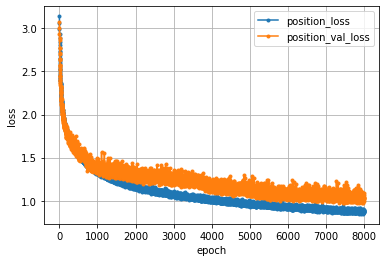

In [11]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()